In [1]:
import game

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np

import agent

In [2]:
def visualize(stateHistory, actionHistory, rewardHistory, N):
    inventory = stateHistory[:, 0, :]
    orders = actionHistory[:, 1, :]
    serviceTimes = actionHistory[:, 0, :]
    reorderPoints = stateHistory[:, 1, :]
    
    print("Time Series")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        
        alpha = 1 if i == 2 else 0.3
#         plt.step(range(N+1), inventory[:, i] * np.roll(np.sign(orders[:, i]), -1), label="inventory")        
        plt.plot(range(N+1), inventory[:, i], label="inventory", alpha=alpha, c='b', linestyle='--', drawstyle='steps')
        plt.step(range(N+1), orders[:, i], label="order quantity", c='orange')
        if i == 2:
            plt.step(range(N+1), reorderPoints[:, i], label="reorder point", c='green')
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Service Time")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), serviceTimes[:, i], label="service time")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    
    print("Inventory")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), inventory[:, i] * np.sign(orders[:, i]), label="inventory")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Rewards")
    plt.figure(figsize=(20, 4))
    plt.step(range(N+1), rewardHistory)
    plt.show()

# single step

In [18]:
learningParams = {
    "gamma": 0.2,
    "alpha": 1,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [1000, 5, 1000], #[5, 1000, 1000], # 
    "muDemand": 2,
    "stdDemand": 0.1,
    "retailerOrder": 10,
    "stockoutCost": 10000, #50000,
    "N": 1000
}

In [19]:
plannerAgent = agent.PlannerWithPolicyGradient(learningParams, envParams["retailerOrder"])
plannerAgent.policy_estimator.stdVal = 10

Time Series


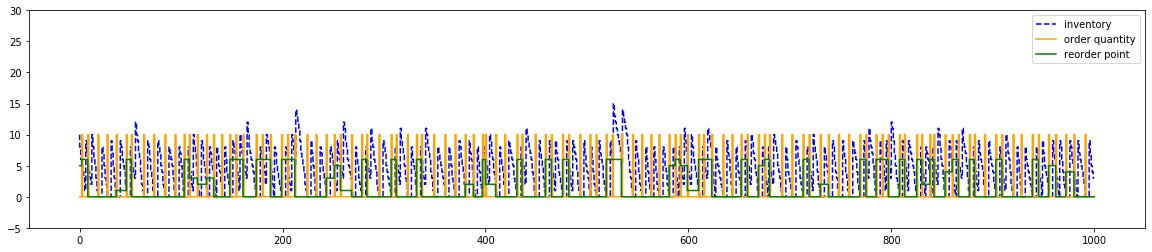

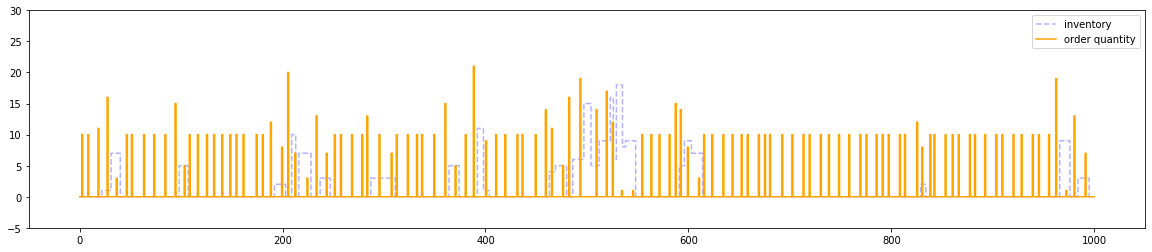

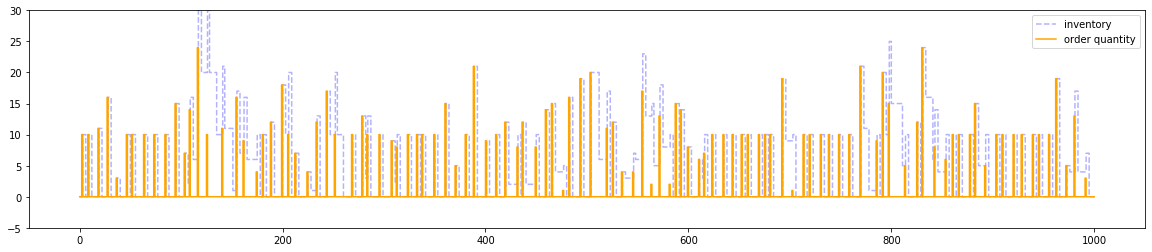

Service Time


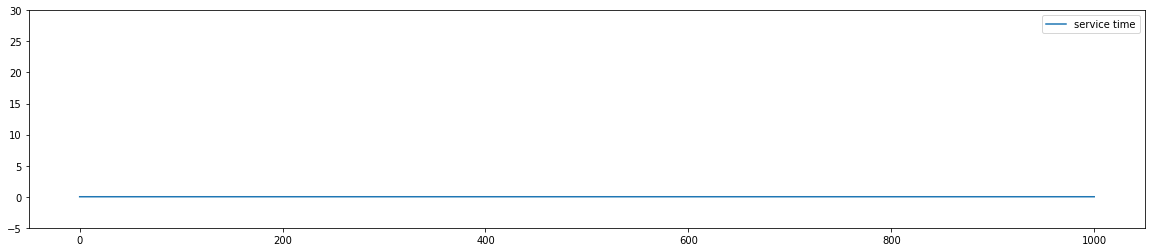

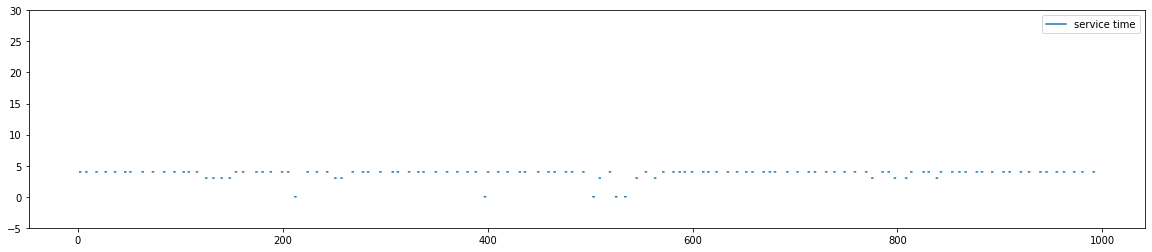

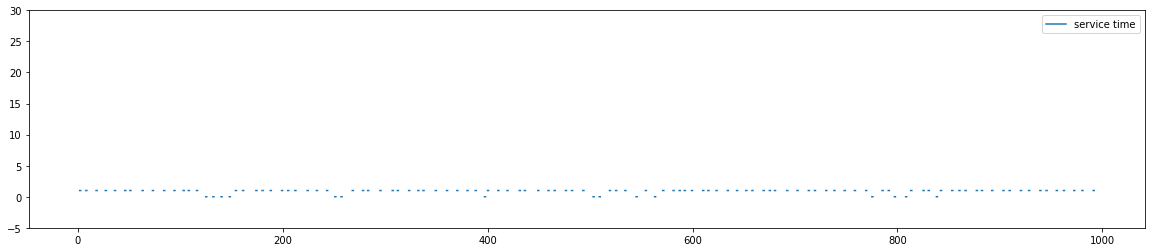

Inventory


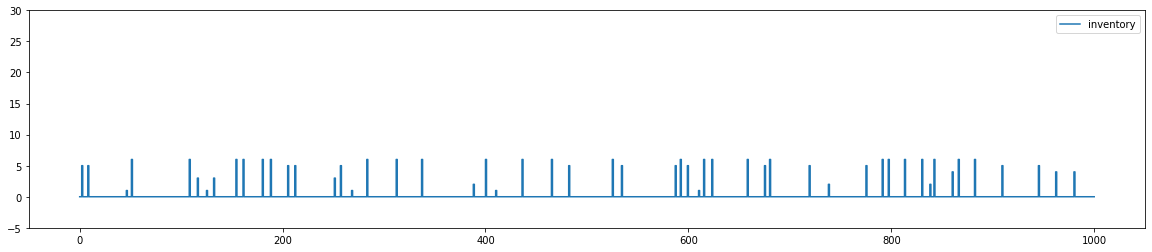

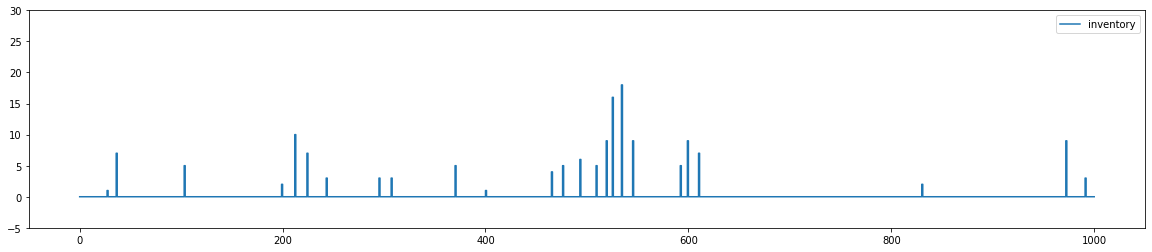

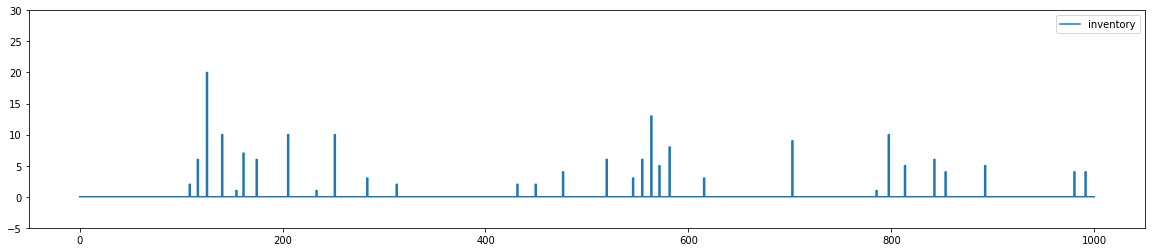

Rewards


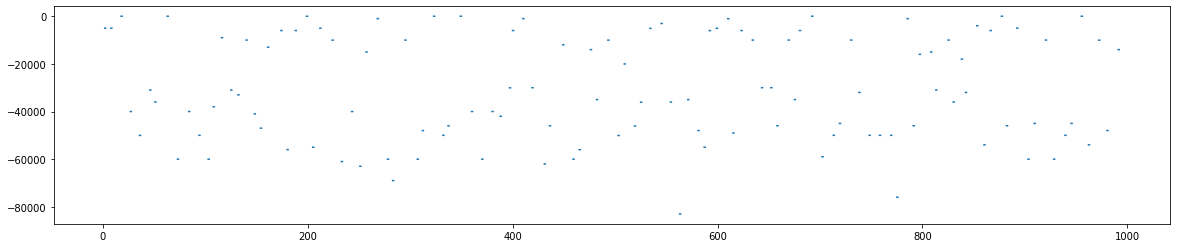

In [20]:
# play the game while training
stateHistory, actionHistory, rewardHistory, experiences = game.runEpisode(envParams, plannerAgent, train=False)

visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])


-144.33458
(array([0.89895713, 1.7035674 , 0.2448477 ], dtype=float32), array([10., 10.,  0.], dtype=float32))


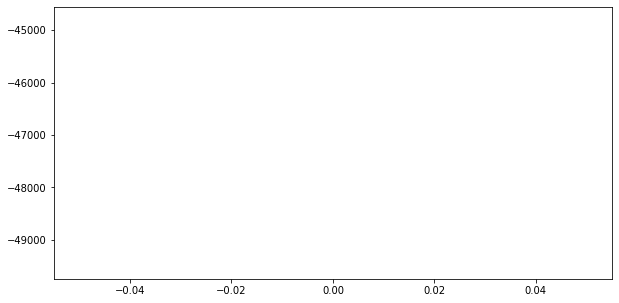

-7472.8193
(array([2.8596752 , 4.8285255 , 0.21325883], dtype=float32), array([10., 10.,  0.], dtype=float32))


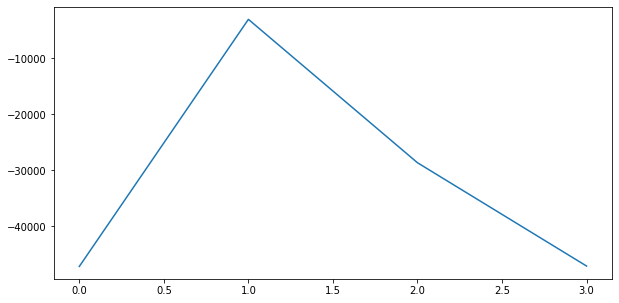

-17311.746
(array([4.118002 , 7.2066765, 1.381242 ], dtype=float32), array([10., 10.,  1.], dtype=float32))


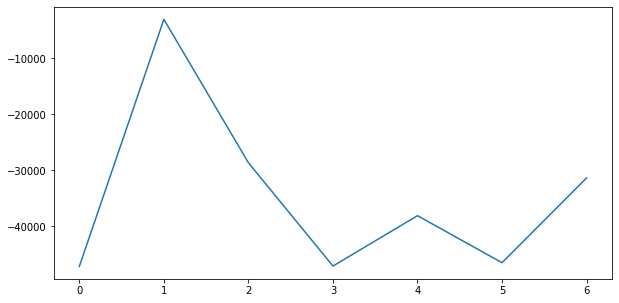

-44842.82
(array([6.6233983, 7.836426 , 2.2462423], dtype=float32), array([10., 10.,  2.], dtype=float32))


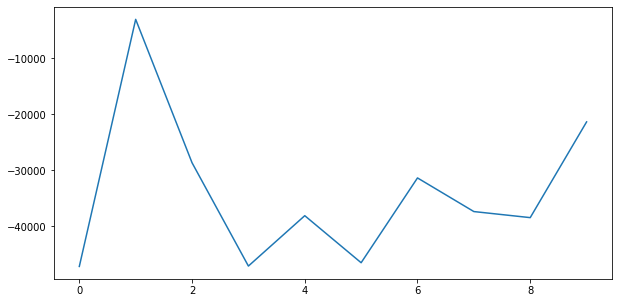

-40548.13
(array([12.500201 , 10.716339 ,  2.3633213], dtype=float32), array([13., 11.,  2.], dtype=float32))


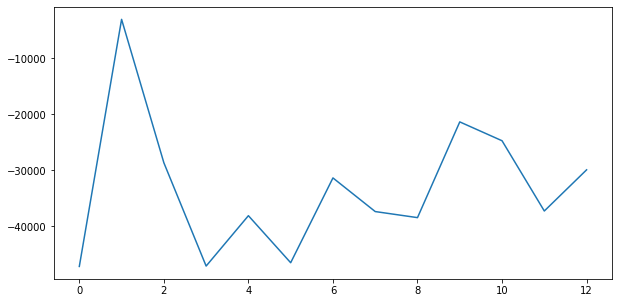

-95578.43
(array([16.484793 , 20.183975 ,  2.0922182], dtype=float32), array([20., 20.,  2.], dtype=float32))


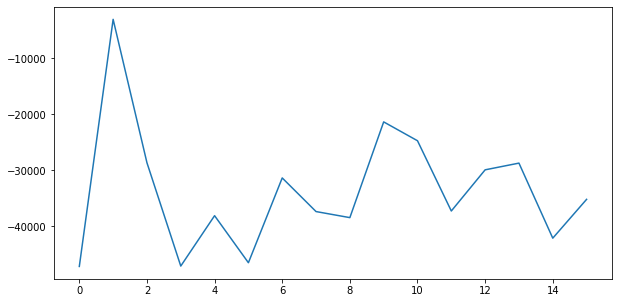

-51217.586
(array([14.65262   , 17.302185  ,  0.71650517], dtype=float32), array([17., 17.,  1.], dtype=float32))


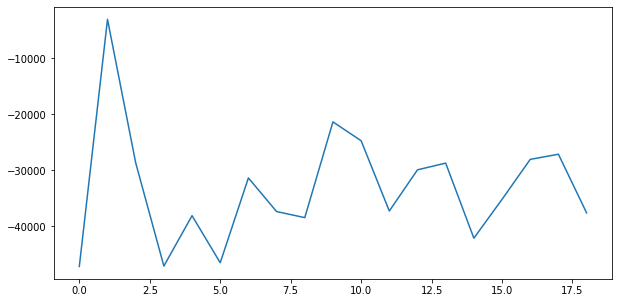

-45689.832
(array([15.944525, 14.670151,  3.055238], dtype=float32), array([16., 15.,  3.], dtype=float32))


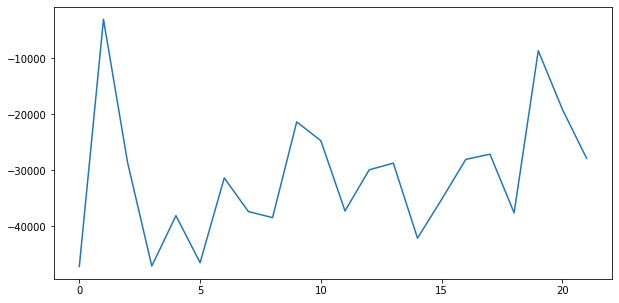

-39532.598
(array([13.550031, 13.180873,  1.772825], dtype=float32), array([14., 13.,  2.], dtype=float32))


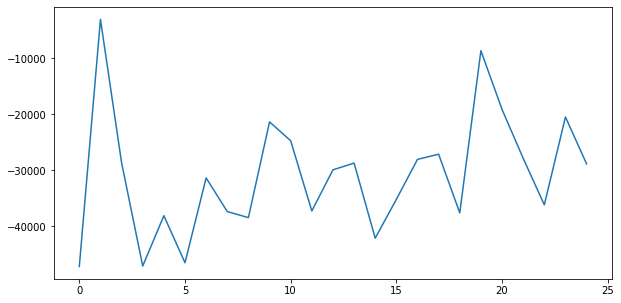

-49230.36
(array([19.350922 , 18.145306 ,  5.3466744], dtype=float32), array([19., 18.,  5.], dtype=float32))


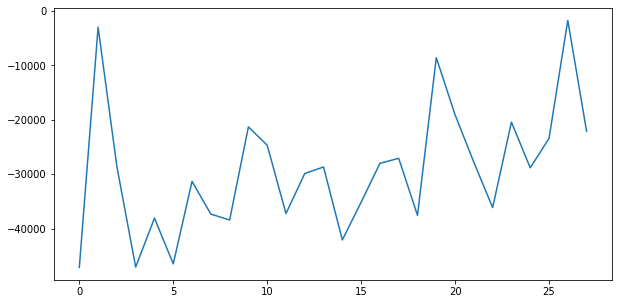

-77820.28
(array([19.05861  , 17.946527 ,  4.6536136], dtype=float32), array([19., 18.,  5.], dtype=float32))


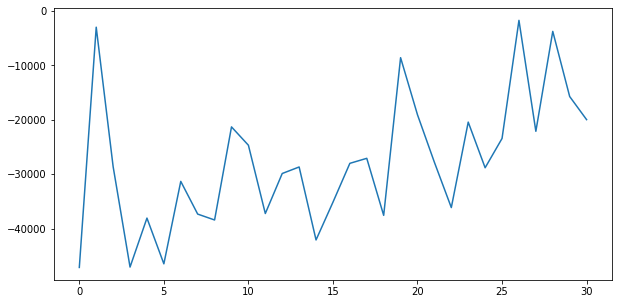

-81942.76
(array([18.754847, 17.726625,  3.423353], dtype=float32), array([19., 18.,  3.], dtype=float32))


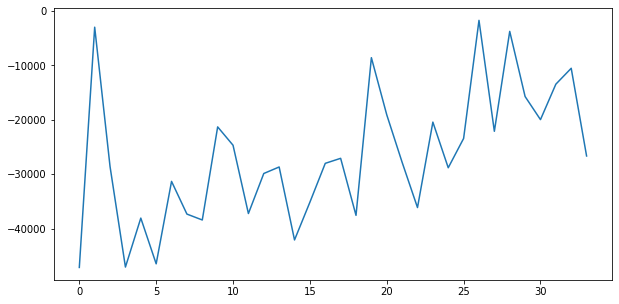

-47450.742
(array([21.79799  , 18.749907 ,  4.4133773], dtype=float32), array([22., 19.,  4.], dtype=float32))


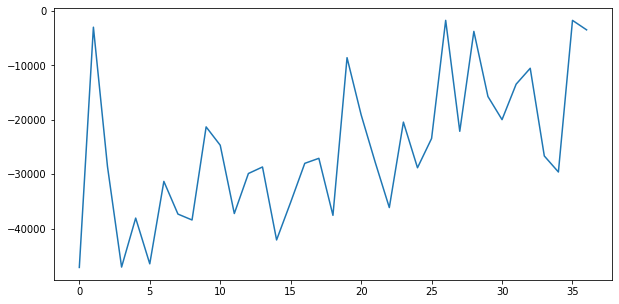

-83746.695
(array([29.143074 , 19.02877  ,  4.6792016], dtype=float32), array([29., 19.,  5.], dtype=float32))


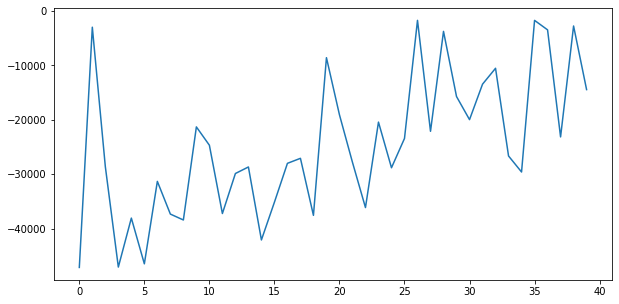

-38466.16
(array([23.769686 , 30.521215 ,  4.1148953], dtype=float32), array([30., 30.,  4.], dtype=float32))


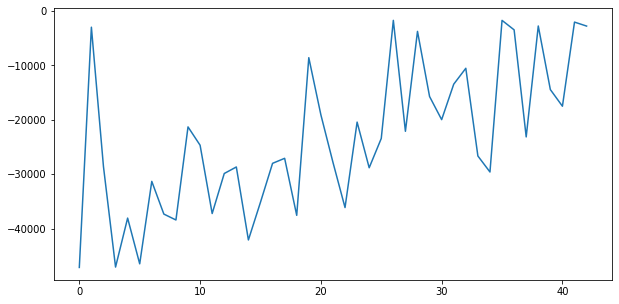

-61653.066
(array([27.39698 , 24.740496,  5.481495], dtype=float32), array([27., 25.,  5.], dtype=float32))


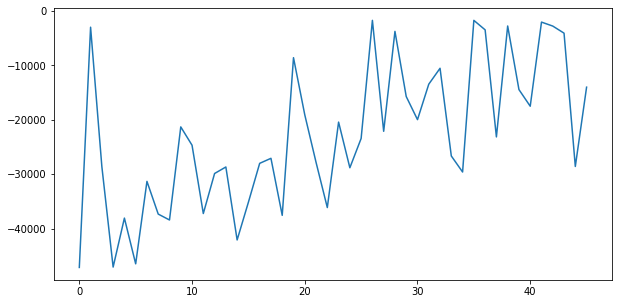

-40489.63
(array([24.943306 , 20.232443 ,  3.5554245], dtype=float32), array([25., 20.,  4.], dtype=float32))


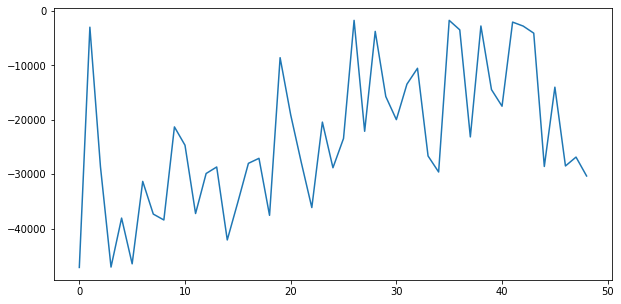

-52335.777
(array([23.000174, 23.0438  ,  6.291642], dtype=float32), array([23., 23.,  6.], dtype=float32))


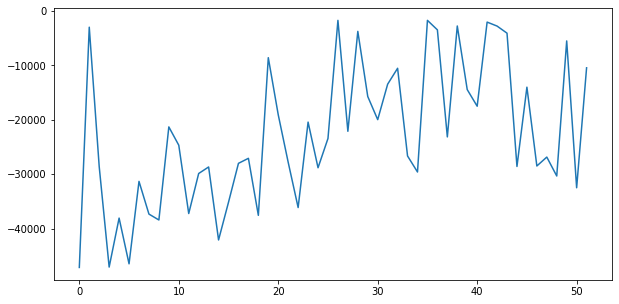

-58285.31
(array([26.801226, 29.077477,  1.517553], dtype=float32), array([29., 29.,  2.], dtype=float32))


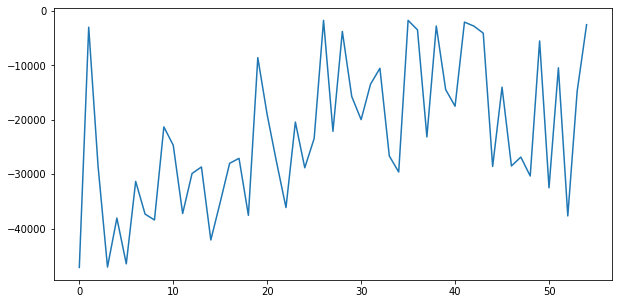

-43505.83
(array([28.754974 , 27.949692 ,  4.2450185], dtype=float32), array([29., 28.,  4.], dtype=float32))


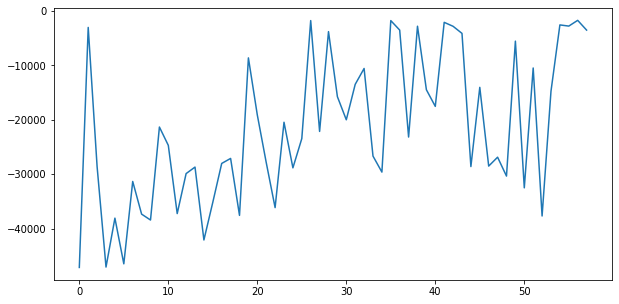

-47725.168
(array([34.870144, 31.02781 ,  9.723477], dtype=float32), array([30., 30.,  6.], dtype=float32))


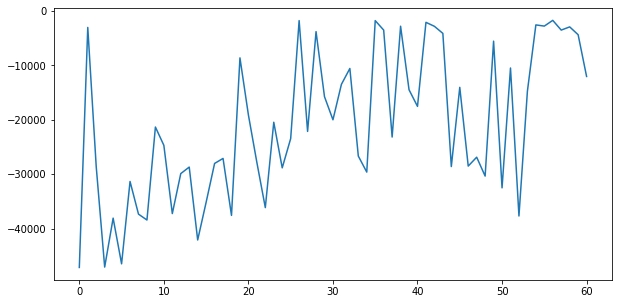

-91760.3
(array([24.877058, 19.70736 ,  5.216335], dtype=float32), array([25., 20.,  5.], dtype=float32))


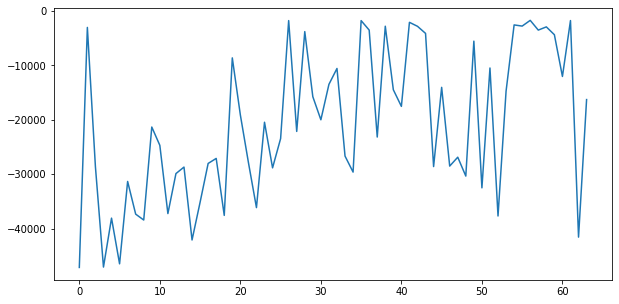

-51719.26
(array([24.694443, 27.224255,  5.930018], dtype=float32), array([27., 27.,  6.], dtype=float32))


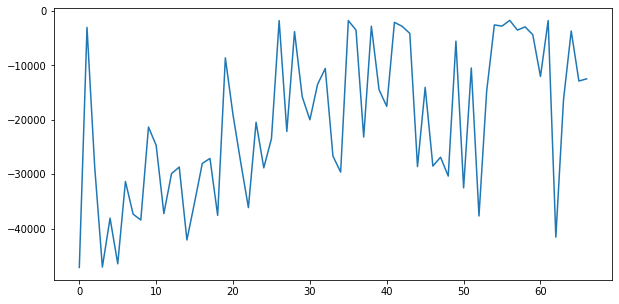

-74618.44
(array([29.311012 , 26.864388 ,  5.0918593], dtype=float32), array([29., 27.,  5.], dtype=float32))


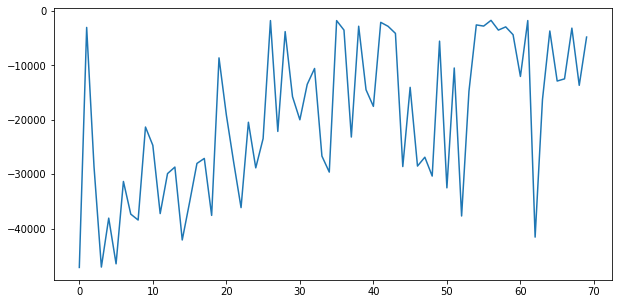

-59497.36
(array([27.631956 , 28.462486 ,  1.4524481], dtype=float32), array([28., 28.,  1.], dtype=float32))


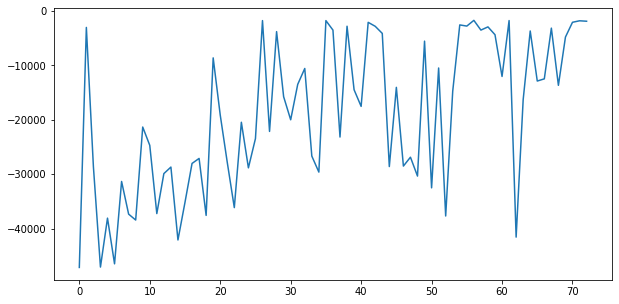

-36339.92
(array([23.966953 , 25.235538 ,  3.8698642], dtype=float32), array([25., 25.,  4.], dtype=float32))


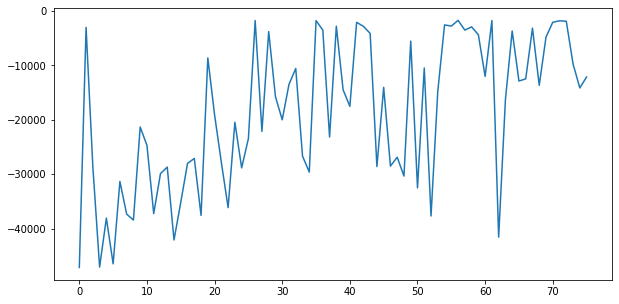

-41691.953
(array([28.388147, 22.062086,  5.598142], dtype=float32), array([28., 22.,  6.], dtype=float32))


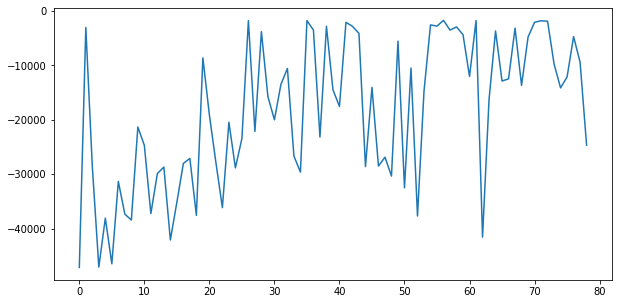

-37705.996
(array([37.644238 , 30.478891 ,  6.8723264], dtype=float32), array([30., 30.,  6.], dtype=float32))


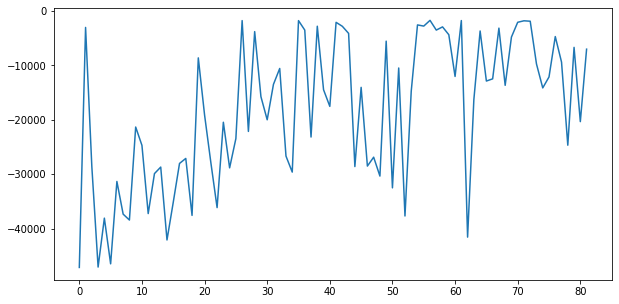

-47910.01
(array([35.24183 , 32.734108,  6.873624], dtype=float32), array([30., 30.,  6.], dtype=float32))


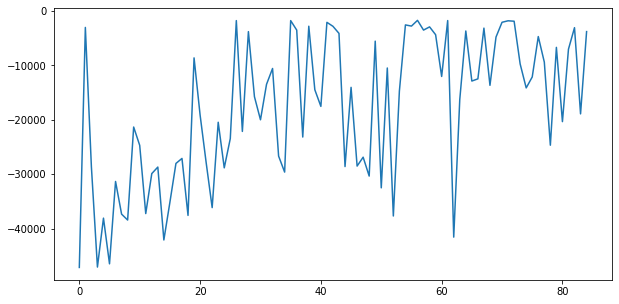

-22345.719
(array([25.850502 , 22.496948 ,  3.7153835], dtype=float32), array([26., 22.,  4.], dtype=float32))


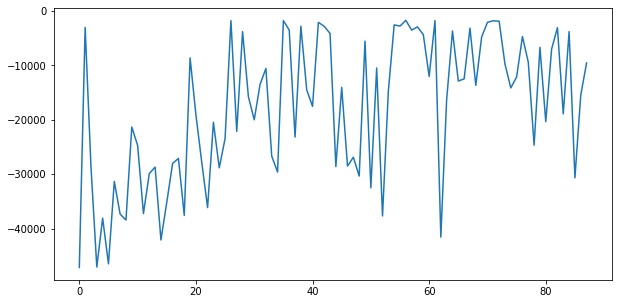

-40936.414
(array([34.152126 , 32.532    ,  5.5858603], dtype=float32), array([30., 30.,  6.], dtype=float32))


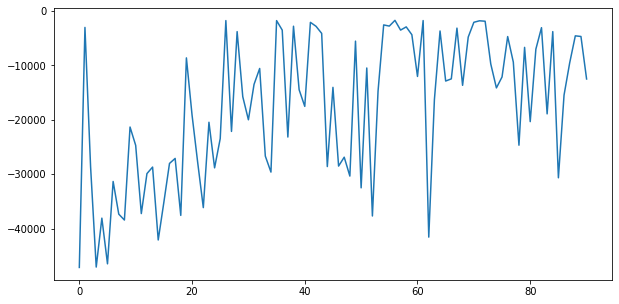

-39071.426
(array([50.87941  , 53.89981  ,  5.0496573], dtype=float32), array([30., 30.,  5.], dtype=float32))


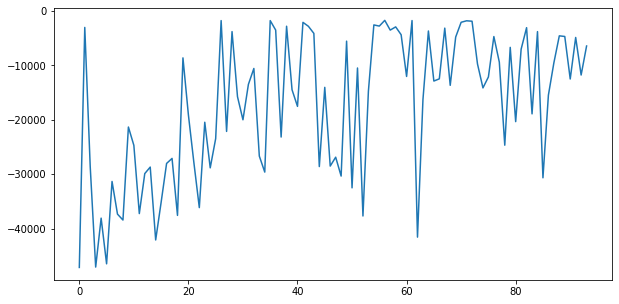

-13880.424
(array([20.660076 , 17.580276 ,  4.1422315], dtype=float32), array([21., 18.,  4.], dtype=float32))


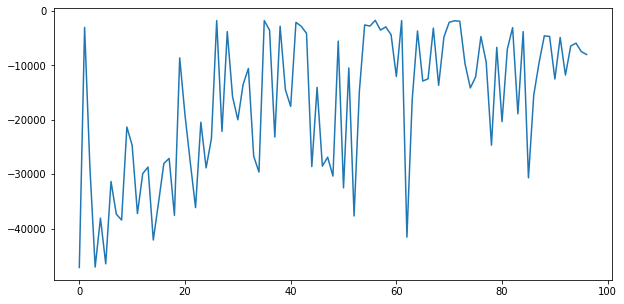

-11196.292
(array([33.76719  , 33.013844 ,  3.4229956], dtype=float32), array([30., 30.,  3.], dtype=float32))


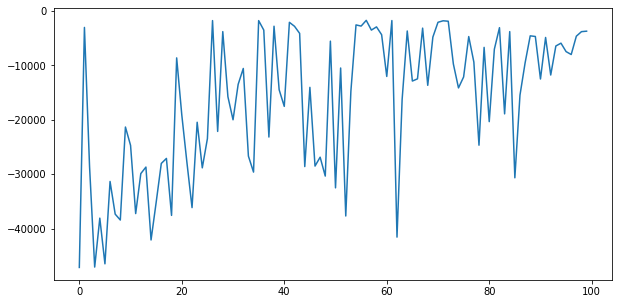

-23968.656
(array([22.233465 , 23.1206   ,  4.1215205], dtype=float32), array([23., 23.,  4.], dtype=float32))


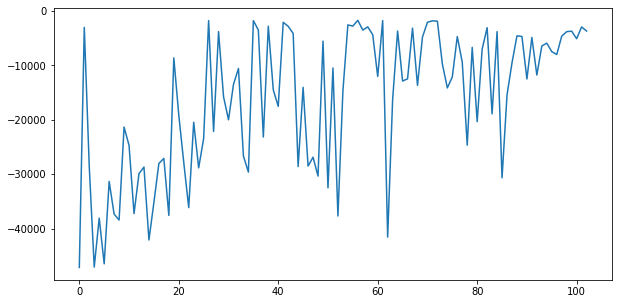

-20963.32
(array([40.826168, 38.795006,  5.137805], dtype=float32), array([30., 30.,  5.], dtype=float32))


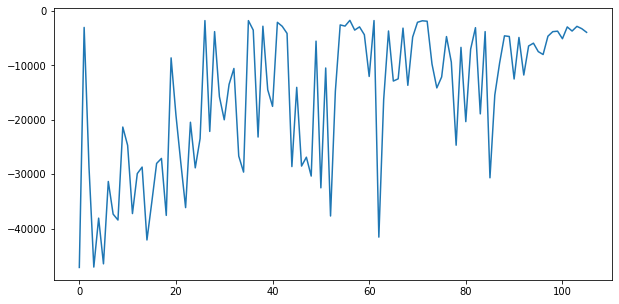

-17034.238
(array([26.828777 , 24.72982  ,  3.3961911], dtype=float32), array([27., 25.,  3.], dtype=float32))


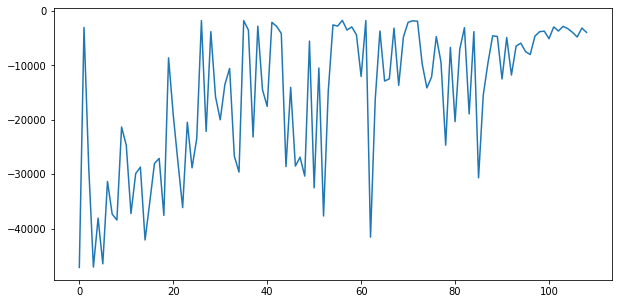

-12644.983
(array([33.72935 , 32.870865,  4.300749], dtype=float32), array([30., 30.,  4.], dtype=float32))


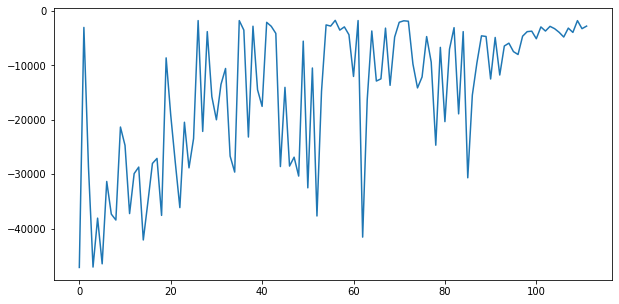

-10708.71
(array([24.715775, 19.487684,  3.403486], dtype=float32), array([25., 19.,  3.], dtype=float32))


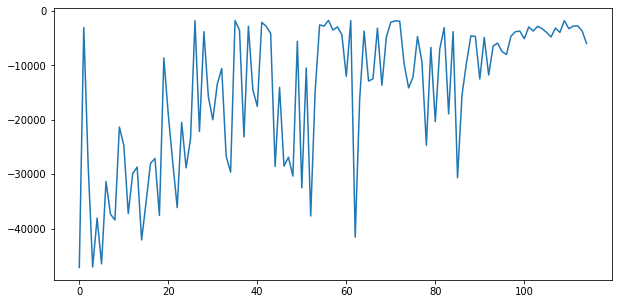

-16531.582
(array([30.474163 , 26.899666 ,  2.9051933], dtype=float32), array([30., 27.,  3.], dtype=float32))


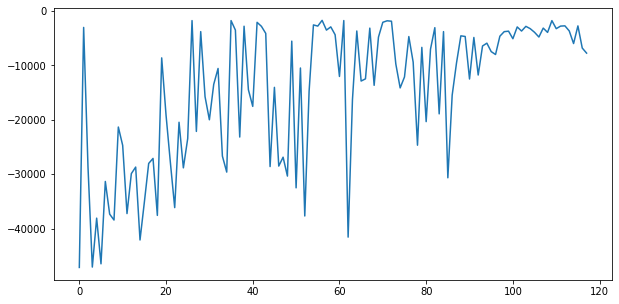

-23047.252
(array([23.068085 , 38.11636  ,  2.6631174], dtype=float32), array([30., 30.,  3.], dtype=float32))


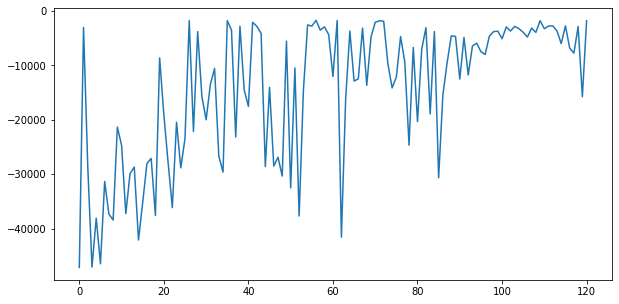

-27270.629
(array([35.544746 , 38.257614 ,  4.2416387], dtype=float32), array([30., 30.,  4.], dtype=float32))


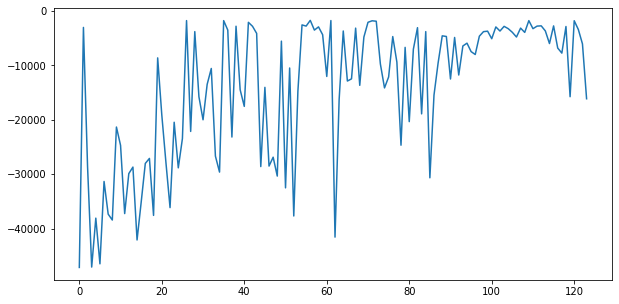

-22674.0
(array([31.60045  , 31.472345 ,  4.0481753], dtype=float32), array([30., 30.,  4.], dtype=float32))


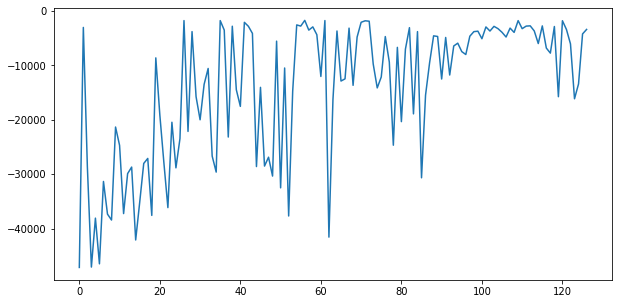

-23057.602
(array([36.571552 , 24.166609 ,  6.6500163], dtype=float32), array([30., 24.,  6.], dtype=float32))


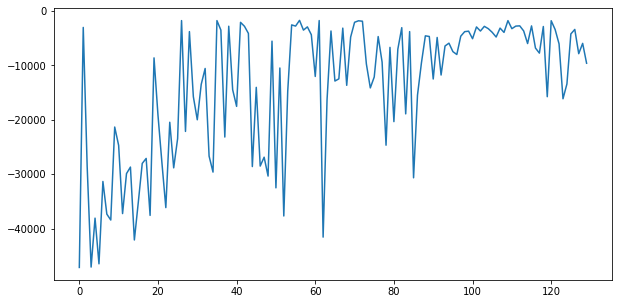

-24312.771
(array([28.622396 , 31.324959 ,  2.3451667], dtype=float32), array([30., 30.,  2.], dtype=float32))


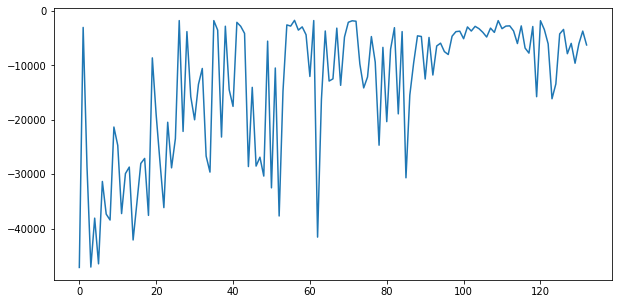

-31532.877
(array([31.401628, 29.35221 ,  3.730722], dtype=float32), array([30., 29.,  4.], dtype=float32))


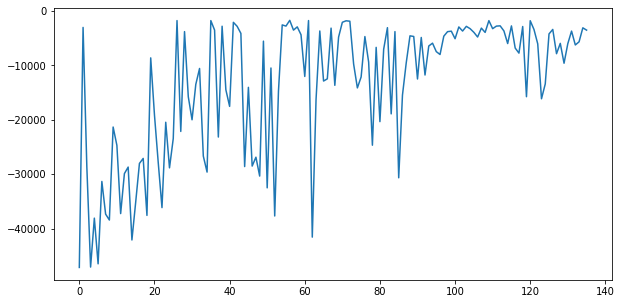

-64852.094
(array([17.154123 , 21.944656 ,  3.8939176], dtype=float32), array([22., 22.,  4.], dtype=float32))


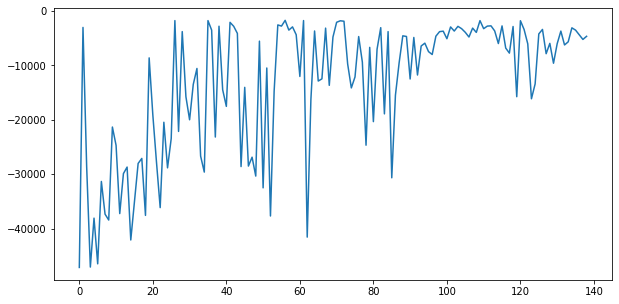

-57595.945
(array([28.196688 , 29.86663  ,  2.3579335], dtype=float32), array([30., 30.,  2.], dtype=float32))


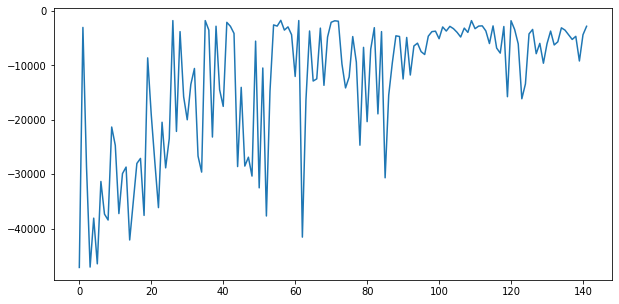

-64869.31
(array([19.135124 , 18.958479 ,  3.7579856], dtype=float32), array([19., 19.,  4.], dtype=float32))


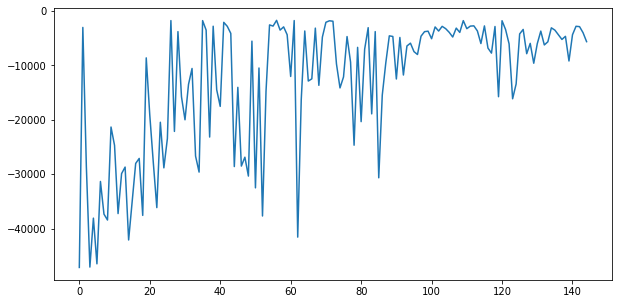

-80921.84
(array([23.897436 , 25.308867 ,  4.9264793], dtype=float32), array([25., 25.,  5.], dtype=float32))


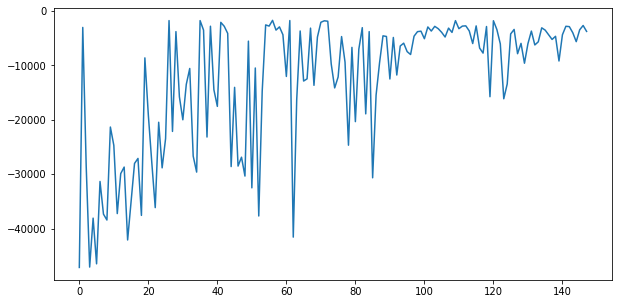

-88923.266
(array([34.745872 , 33.719254 ,  3.8591452], dtype=float32), array([30., 30.,  4.], dtype=float32))


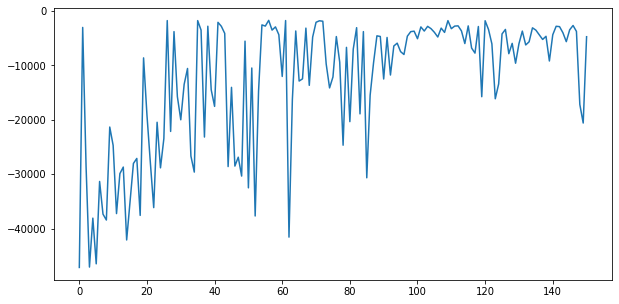

-92801.875
(array([39.11197  , 40.43026  ,  2.8303492], dtype=float32), array([30., 30.,  3.], dtype=float32))


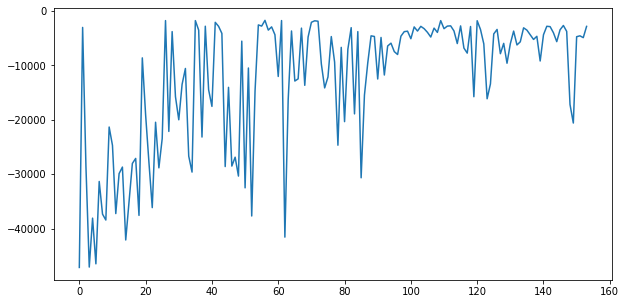

-82569.734
(array([24.637117, 22.40496 ,  4.292629], dtype=float32), array([25., 22.,  4.], dtype=float32))


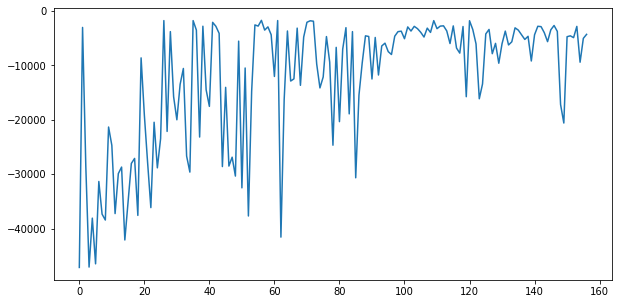

-83049.805
(array([33.77116  , 31.080473 ,  2.7173474], dtype=float32), array([30., 30.,  3.], dtype=float32))


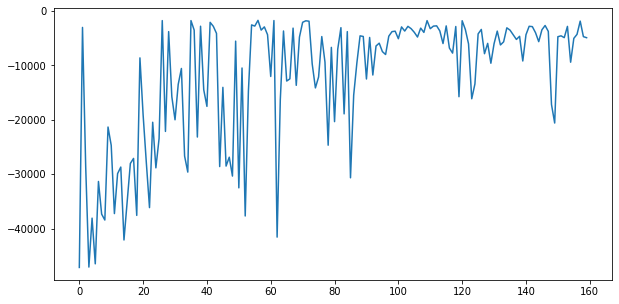

-85612.39
(array([35.65083  , 28.922142 ,  3.6450756], dtype=float32), array([30., 29.,  4.], dtype=float32))


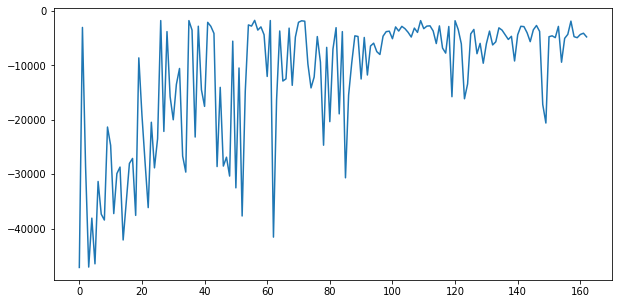

-51561.11
(array([31.051657 , 31.241135 ,  1.7491992], dtype=float32), array([30., 30.,  2.], dtype=float32))


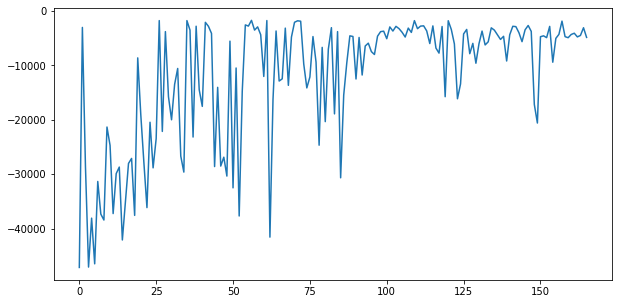

-75244.56
(array([26.62581 , 21.882965,  3.304778], dtype=float32), array([27., 22.,  3.], dtype=float32))


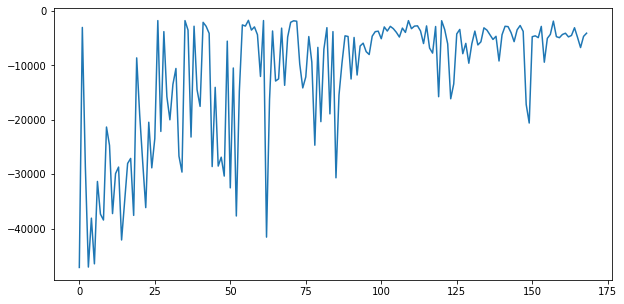

-64519.234
(array([16.324162, 18.967545,  1.57161 ], dtype=float32), array([19., 19.,  2.], dtype=float32))


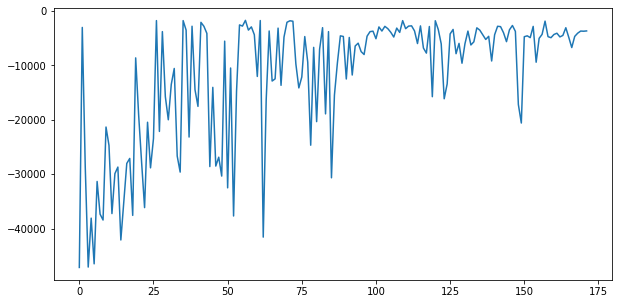

-88907.805
(array([20.215597 , 18.757433 ,  2.6274042], dtype=float32), array([20., 19.,  3.], dtype=float32))


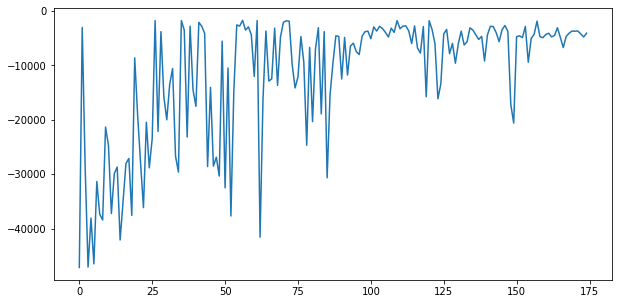

-85641.96
(array([32.98032  , 28.745537 ,  4.0348554], dtype=float32), array([30., 29.,  4.], dtype=float32))


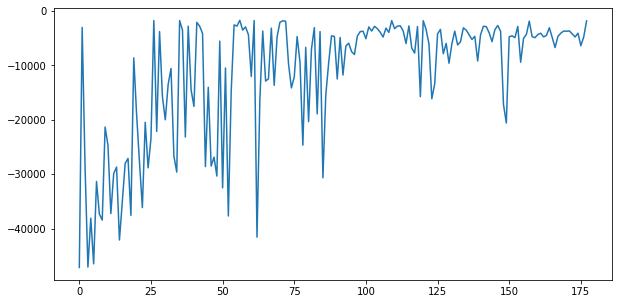

-99282.58
(array([33.210453 , 29.464361 ,  5.3711333], dtype=float32), array([30., 29.,  5.], dtype=float32))


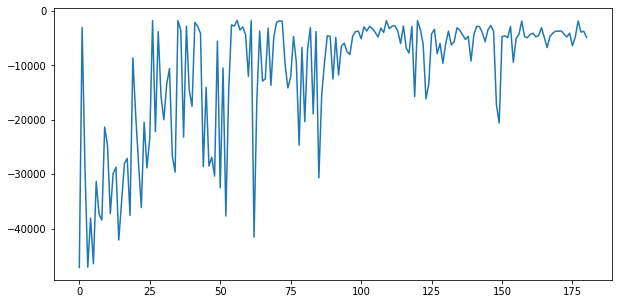

-75965.46
(array([27.786058 , 26.526154 ,  3.8832254], dtype=float32), array([28., 27.,  4.], dtype=float32))


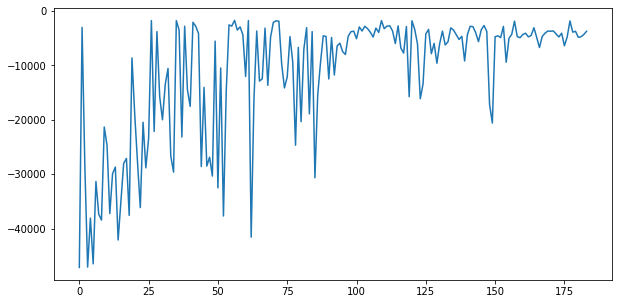

-50139.734
(array([25.73582 , 27.067974,  4.530242], dtype=float32), array([27., 27.,  5.], dtype=float32))


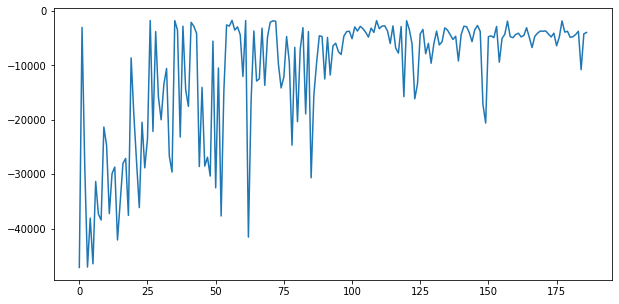

-49703.758
(array([33.20599  , 32.41329  ,  3.9600499], dtype=float32), array([30., 30.,  4.], dtype=float32))


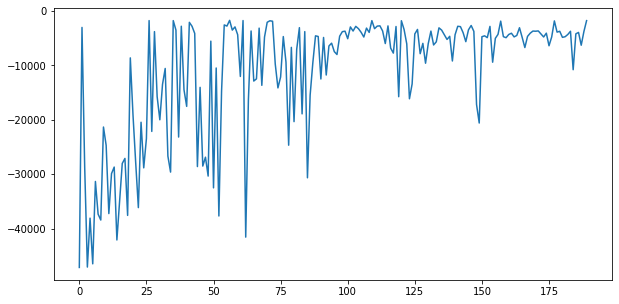

-65895.78
(array([22.890568 , 22.880749 ,  2.4504821], dtype=float32), array([23., 23.,  2.], dtype=float32))


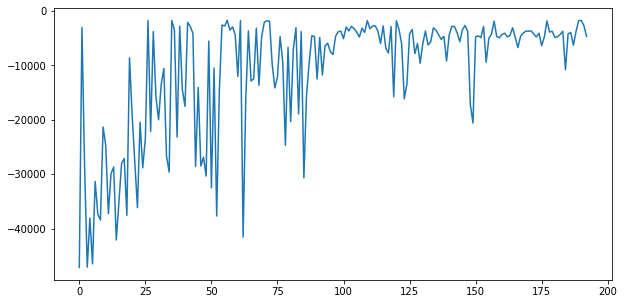

-35598.445
(array([15.0706415, 13.1207075,  2.2344825], dtype=float32), array([15., 13.,  2.], dtype=float32))


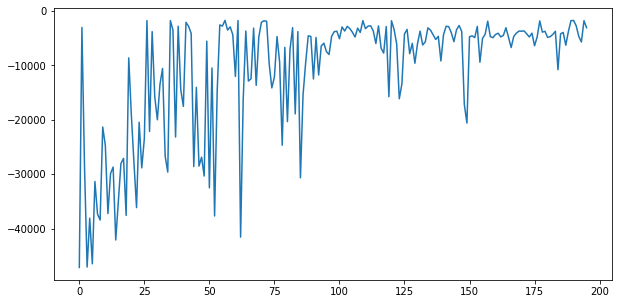

-50890.92
(array([29.178858 , 25.793688 ,  2.9454074], dtype=float32), array([29., 26.,  3.], dtype=float32))


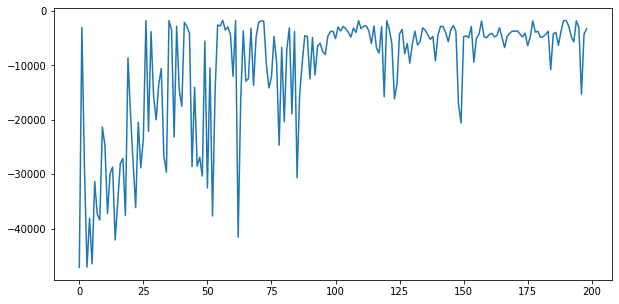

In [21]:
rewardsAll = []
experienceAll = []
N = 200
for i in tqdm_notebook(range(N)):
    # play the game while trainings
    plannerAgent.policy_estimator.stdVal = 10
    _, _, rewards, experiences = game.runEpisode(envParams, plannerAgent, train=True)
    experienceAll.extend(experiences)
    
    # test
    plannerAgent.policy_estimator.stdVal = 0
    _, _, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=False)
    averageRewards = np.nansum(rewardHistory)/np.count_nonzero(~np.isnan(rewardHistory))
    rewardsAll.append(averageRewards)
    
    if (i % 3 == 0): # & (i > 0):
        print(plannerAgent.value_estimator.predict(np.array([0, 0, 0])))
        print(plannerAgent.policy_estimator.predict(np.array([0, 0, 0]), capacity=[30, 30, 30], retailerOrderQty=10))
        plt.figure(figsize=(10, 5))
        plt.plot(rewardsAll)
        plt.show()
        

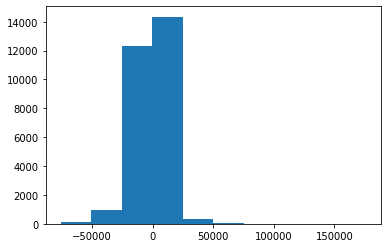

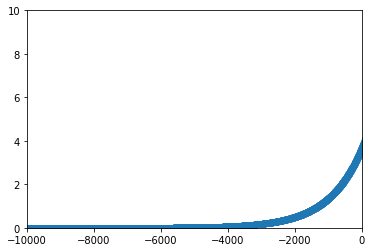

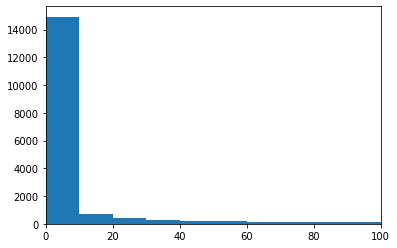

In [22]:
# visualize target recorder -> to determine exp
plt.hist(plannerAgent.policy_estimator.targetRecorder)
plt.show()

y = [10 * np.exp((x-1000) / 1000) for x in plannerAgent.policy_estimator.targetRecorder]
# y = [10 * np.exp(x / 2000) for x in plannerAgent.policy_estimator.targetRecorder]
plt.scatter(plannerAgent.policy_estimator.targetRecorder, y, alpha=0.2)
plt.ylim((0, 10))
plt.xlim((-10000, 0))
plt.show()

plt.hist(y, range=(0, 100))
plt.xlim((0, 100))
plt.show()

[1000, 5, 1000]
Time Series


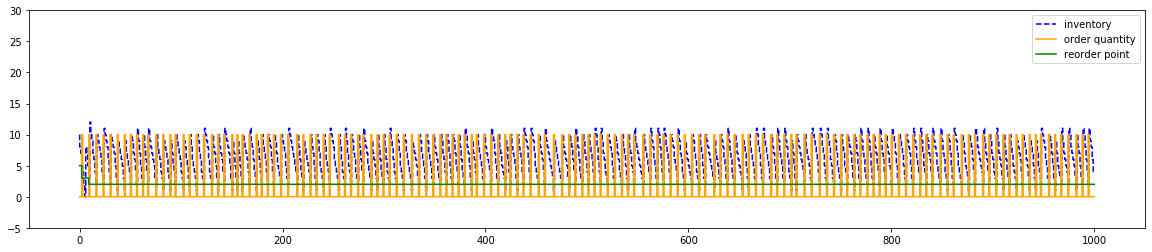

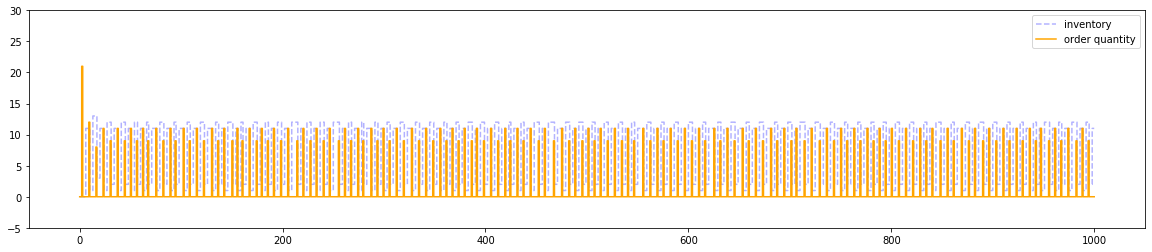

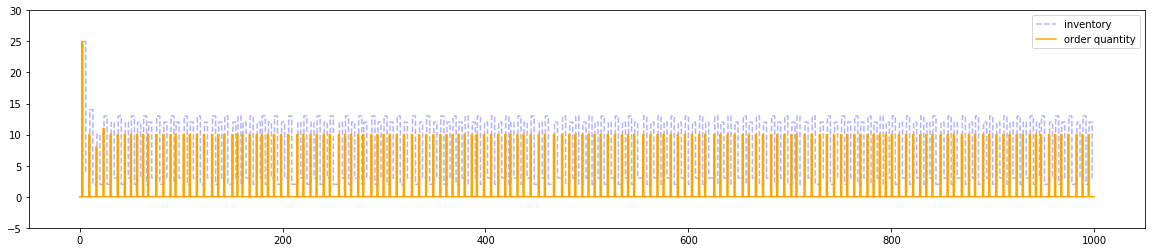

Service Time


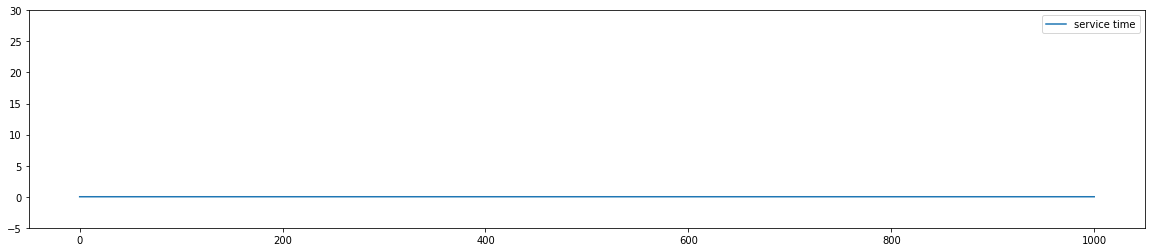

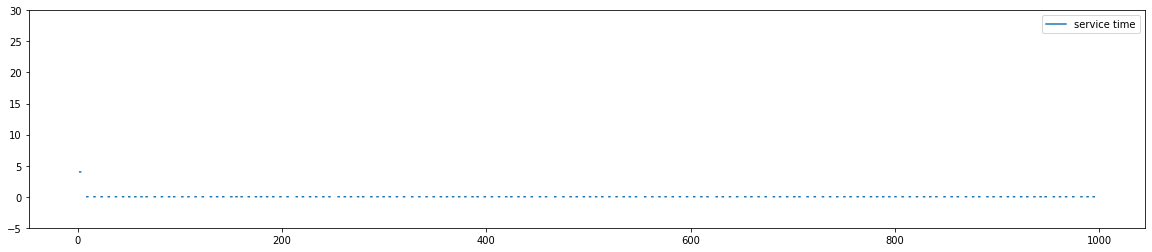

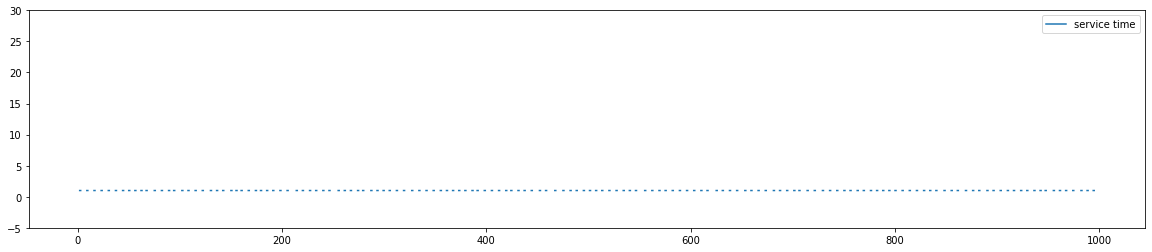

Inventory


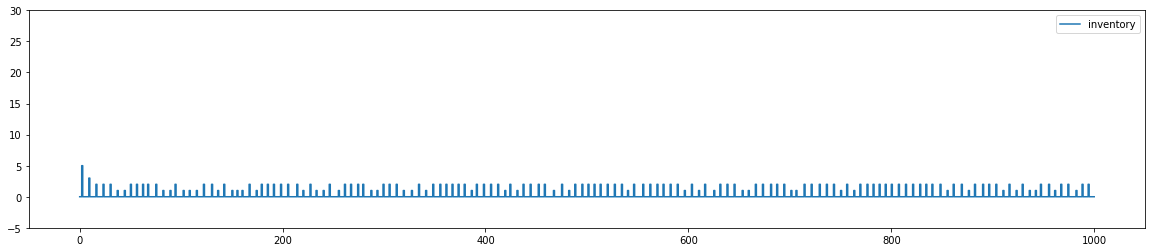

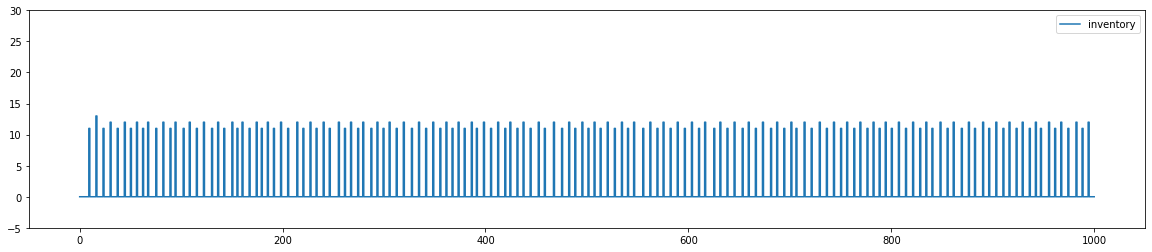

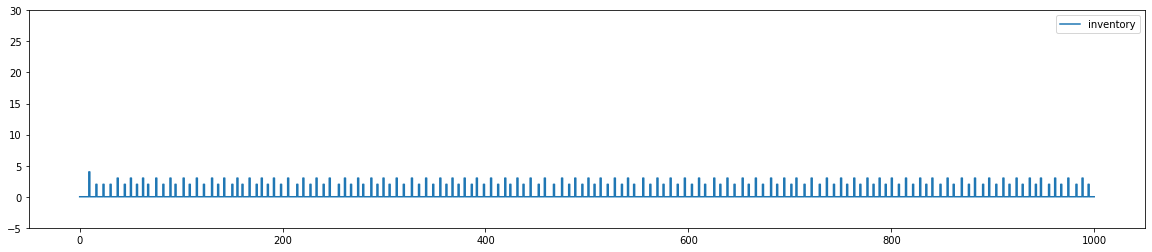

Rewards


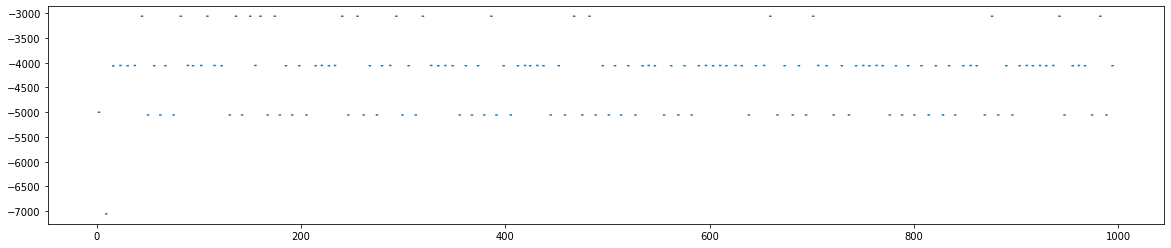

In [23]:
plannerAgent.policy_estimator.stdVal = 0
envParams["N"] = 1000

print(envParams["inventoryCost"])
# play the game while training
stateHistory, actionHistory, rewardHistory, experiences = game.runEpisode(envParams, plannerAgent, train=False)

visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])


In [24]:
# note reorder point
reorderPoints = stateHistory[:, 1, 2]
meanReorderPoint = reorderPoints.mean()

orders = actionHistory[:, 1, :]

# note inventories 0
node0Inventories = stateHistory[:, 0, 0] 
filterInv = np.roll(np.sign(orders[:, 0]), -1)
node0Inventories = node0Inventories[np.where(filterInv == 1)]
node0InventoryMean = node0Inventories.mean() if (len(node0Inventories) > 0) else 0

# note inventories 1
node1Inventories = stateHistory[:, 0, 1] 
filterInv = np.roll(np.sign(orders[:, 1]), -1)
node1Inventories = node1Inventories[np.where(filterInv == 1)]
node1InventoryMean = node1Inventories.mean() if (len(node1Inventories) > 0) else 0

print(envParams)
print(node0InventoryMean, node1InventoryMean, meanReorderPoint)


{'inventoryCost': [1000, 5, 1000], 'muDemand': 2, 'stdDemand': 0.1, 'retailerOrder': 10, 'stockoutCost': 10000, 'N': 1000}
2.4832214765100673 11.429530201342281 2.015984015984016


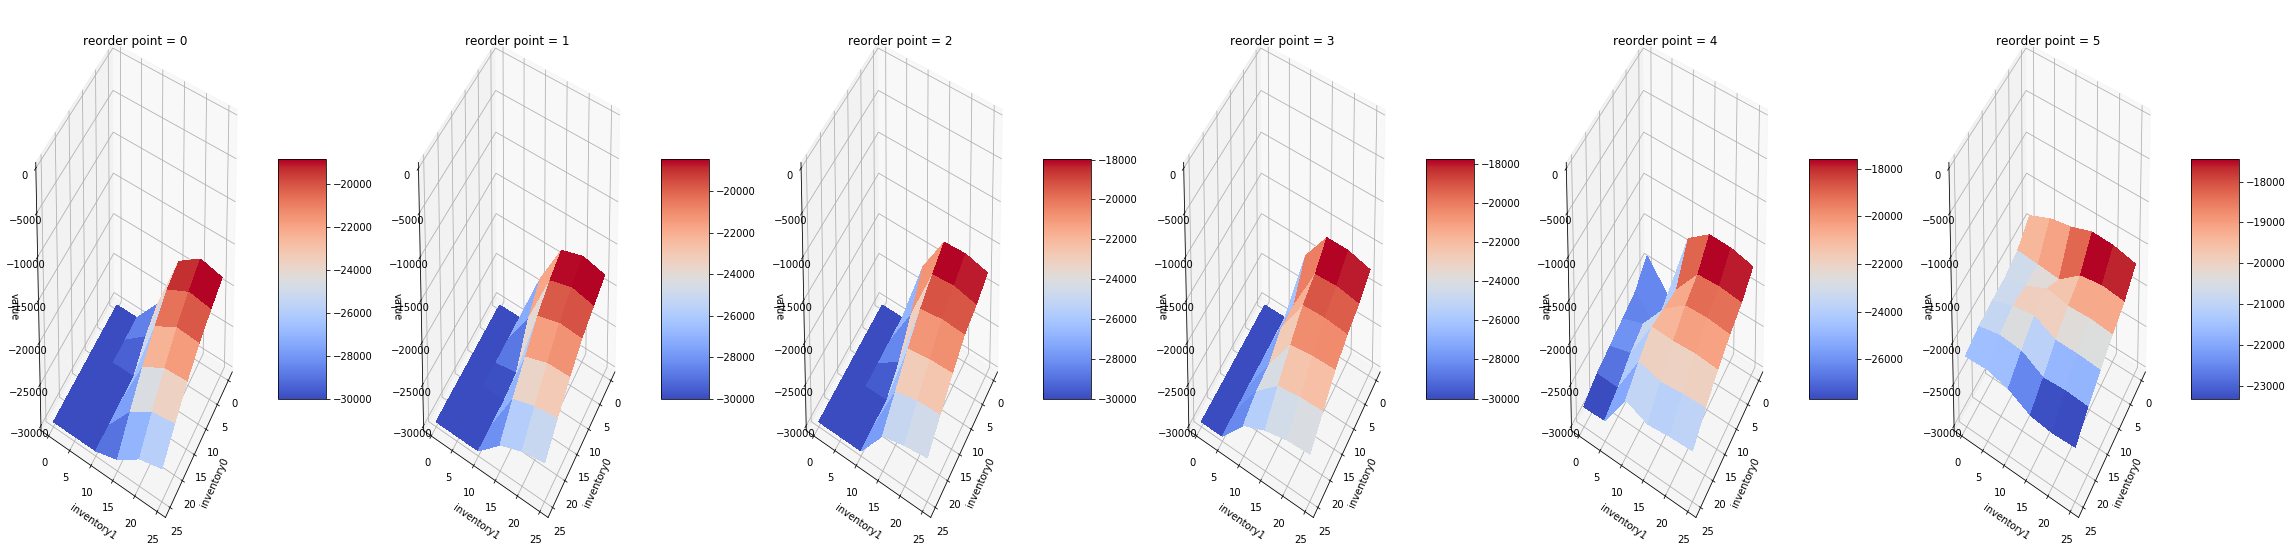

In [25]:
"""
Illustrate Value Network
proxy to objective function
"""
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm


fig = plt.figure(figsize=(40, 10))
for w in range(0, 6, 1):
    loc = w + 1
    ax = fig.add_subplot(1, 6, loc, projection='3d')
    # Make data.
    X = np.arange(0, 30, 5)
    Y = np.arange(0, 30, 5)
    X, Y = np.meshgrid(X, Y)

    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            s = np.array([X[i,j], Y[i,j], w])
            state = np.reshape(s, (1, 3))
            z = plannerAgent.value_estimator.predict(state)
            Z[i, j] = z if z > -30000 else -30000

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_title("reorder point = {}".format(w))
    ax.set_xlabel("inventory0")
    ax.set_ylabel("inventory1")
    ax.set_zlabel("value")
    
    ax.set_zlim((-30000, 0))
    ax.view_init(30, 30)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
plt.show()


row 0: node0_Order, row 1: node1_Order, row 2: reorderPoint


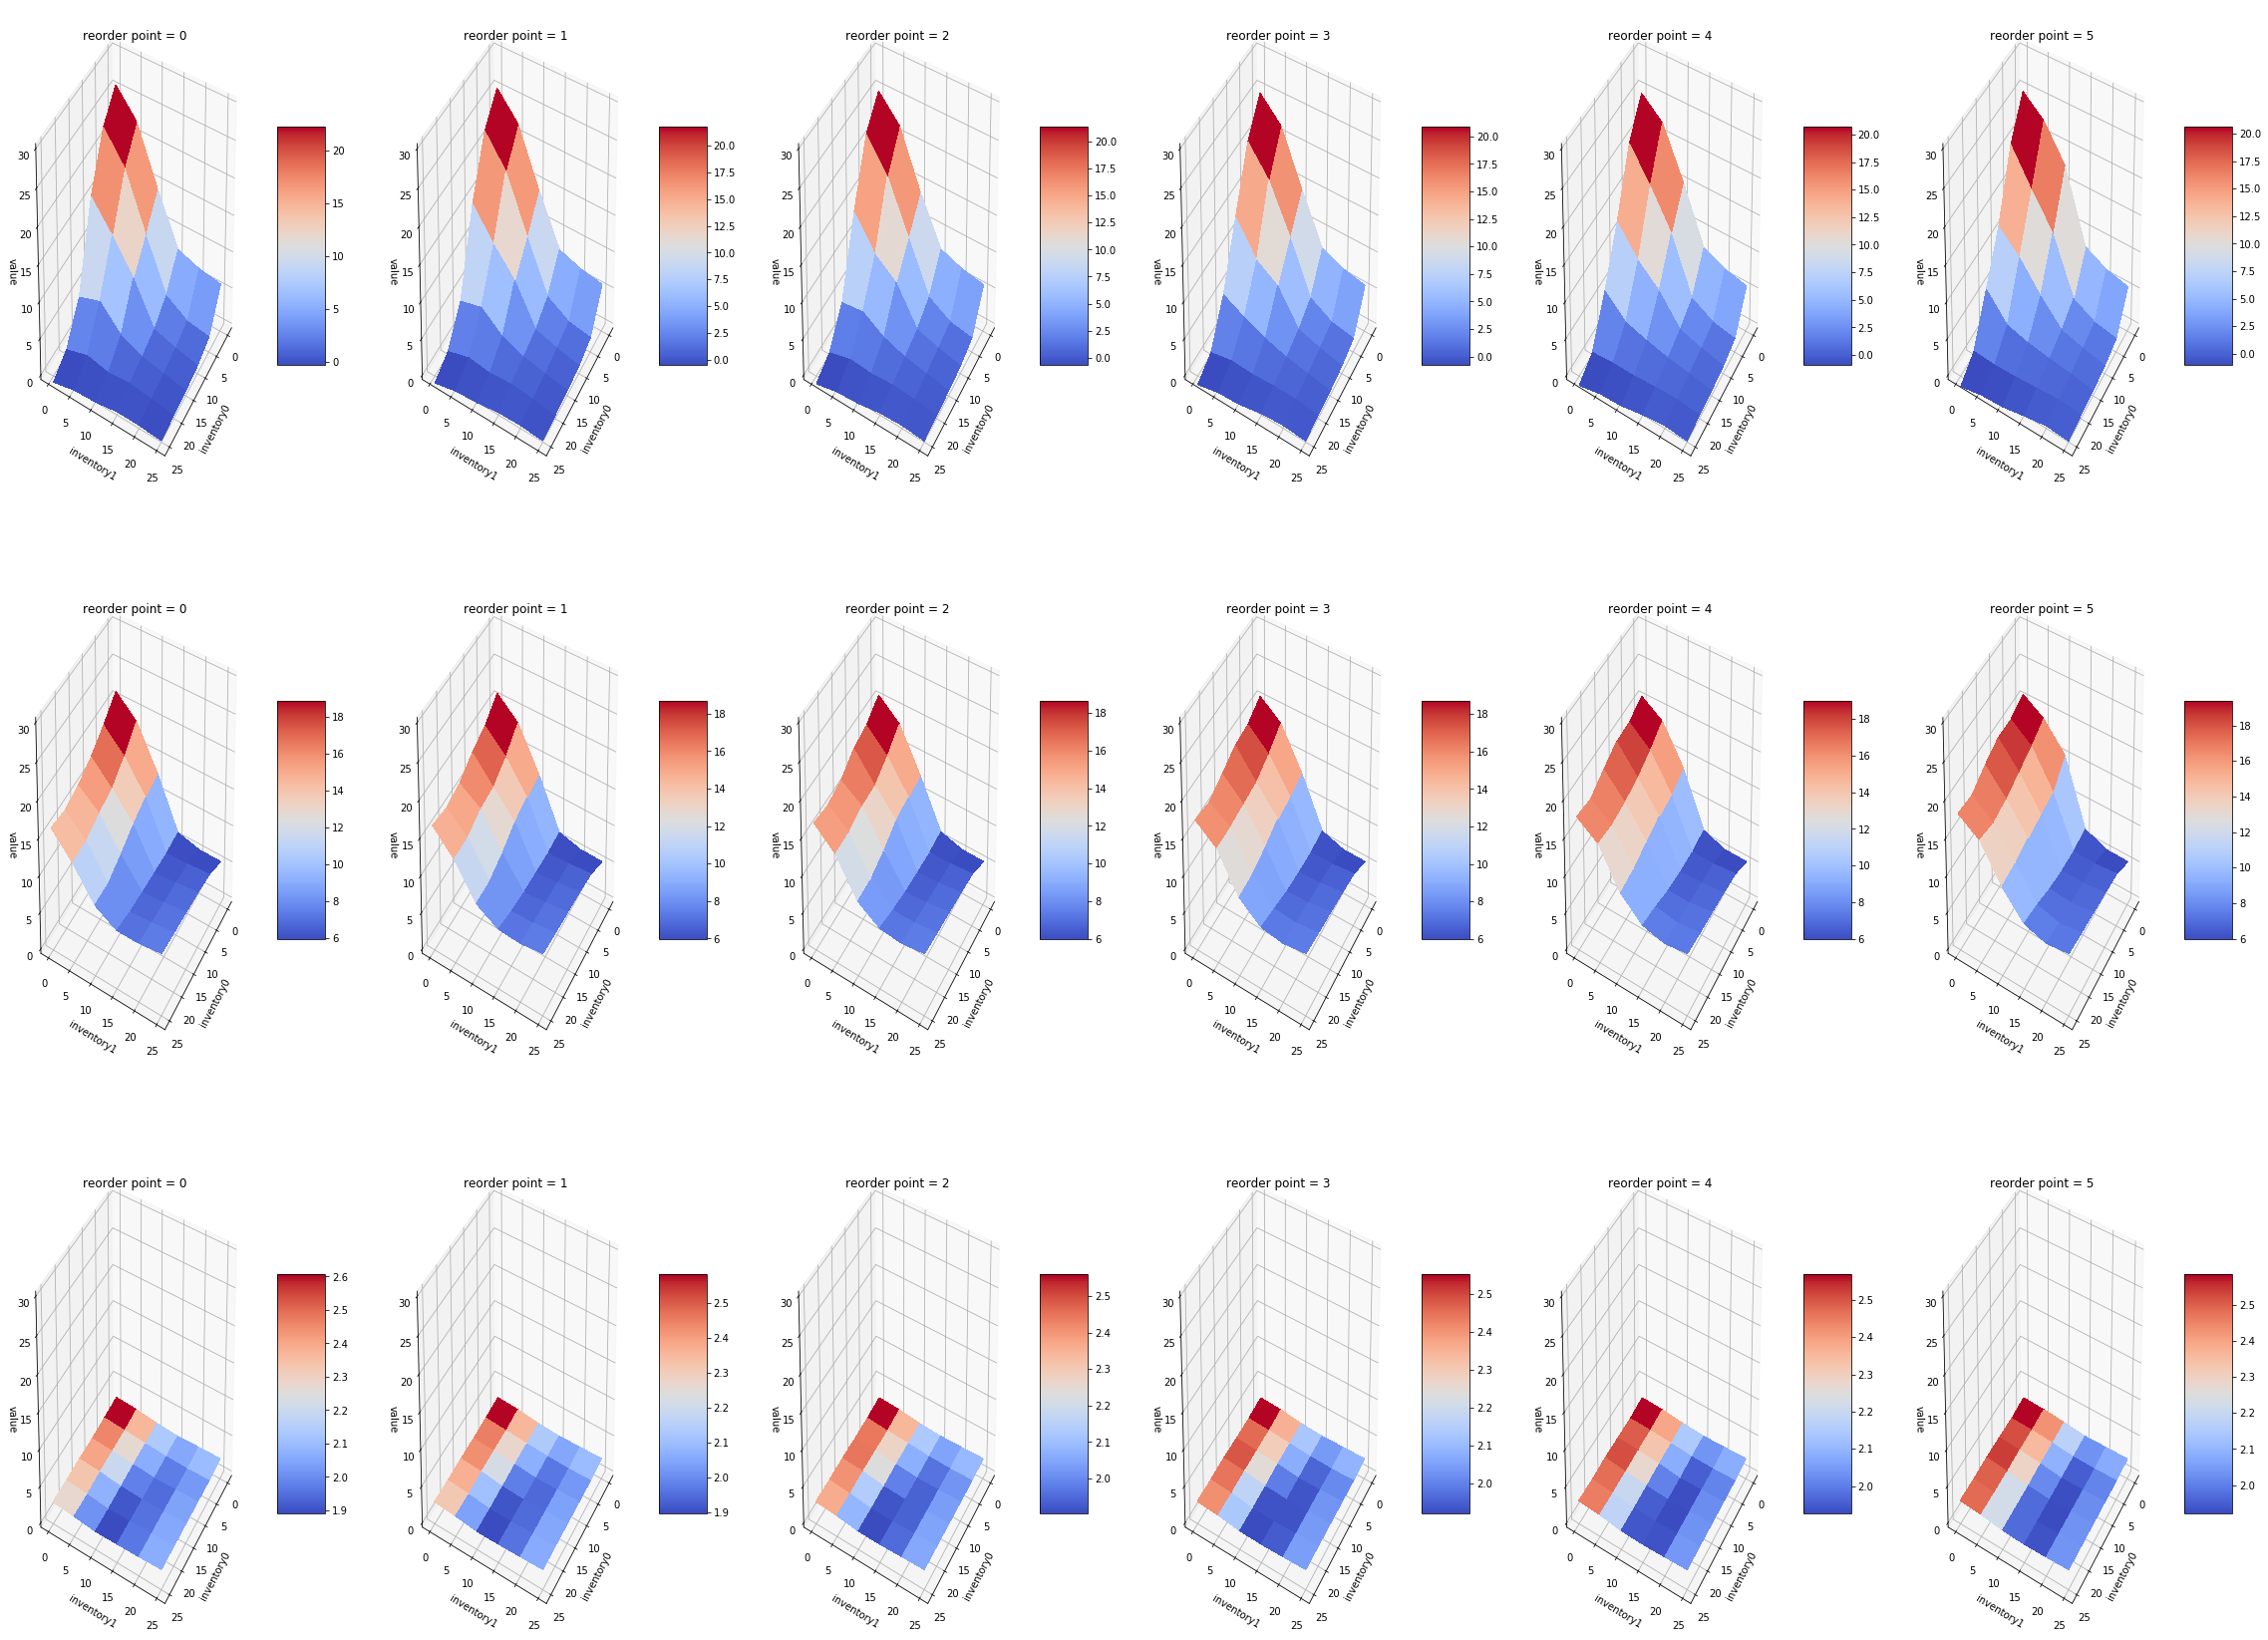

In [26]:
"""
Illustrate Policy Network
proxy to objective function
"""

from matplotlib import cm

plannerAgent.policy_estimator.stdVal = 0

fig = plt.figure(figsize=(40, 30))
for actionID in range(3):
    for w in range(0, 6, 1):
        loc = (6*actionID) + (w+1)
        ax = fig.add_subplot(3, 6, loc, projection='3d')
        # Make data.
        X = np.arange(0, 30, 5)
        Y = np.arange(0, 30, 5)
        X, Y = np.meshgrid(X, Y)

        Z = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                s = np.array([X[i,j], Y[i,j], w])
                state = s
                mu, a = plannerAgent.policy_estimator.predict(state, capacity=[30, 30, 30], retailerOrderQty=10)
                z = mu[actionID]
#                 z = a[actionID]
                Z[i, j] = z

        # Plot the surface.
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        ax.set_title("reorder point = {}".format(w))
        ax.set_xlabel("inventory0")
        ax.set_ylabel("inventory1")
        ax.set_zlabel("value")
        ax.view_init(30, 30)
        ax.set_zlim((0, 30))

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

print("row 0: node0_Order, row 1: node1_Order, row 2: reorderPoint")
        
plt.show()


In [14]:
raise Exception("")

Exception: 

# multiple experiments

In [23]:
from tqdm import tqdm_notebook

In [24]:
learningParams = {
    "gamma": 0.2,
    "alpha": 0.8,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [1000, 5, 1000], #[5, 1000, 1000], #
    "muDemand": 2,
    "stdDemand": 0.1, #0, #
    "retailerOrder": 10,
    "stockoutCost": 10000, 
    "N": 1000
}

In [25]:
NSimulation = 10
NGame = 200

reorderPointsAll = []
meanReorderPoints = []
node0InventoriesAll = []
node0InventoryMeans = []
node1InventoriesAll = []
node1InventoryMeans = []
rewardsAll = []
rewardMeans = []
for _ in range(NSimulation):
    # create central planner
    plannerAgent = agent.PlannerWithPolicyGradient(learningParams, envParams["retailerOrder"])
    plannerAgent.policy_estimator.stdVal = 10

    # training
    for _ in tqdm_notebook(range(NGame)):
        game.runEpisode(envParams, plannerAgent, train=True)
    
    # test
    plannerAgent.policy_estimator.stdVal = 0
    stateHistory, actionHistory, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=False)
        
    # note reorder point
    reorderPoints = stateHistory[:, 1, 2]
    reorderPointsAll.append(reorderPoints)
    meanReorderPoint = reorderPoints.mean()
    meanReorderPoints.append(meanReorderPoint)

    
    orders = actionHistory[:, 1, :]

    # note inventories 0
    node0Inventories = stateHistory[:, 0, 0] 
    node0InventoriesAll.append(node0Inventories)
    # consider inventory before order
    filterInv = np.roll(np.sign(orders[:, 0]), -1)
    node0Inventories = node0Inventories[np.where(filterInv == 1)]
    node0InventoryMean = node0Inventories.mean() if (len(node0Inventories) > 0) else 0
    node0InventoryMeans.append(node0InventoryMean)
    
    # note inventories 1
    node1Inventories = stateHistory[:, 0, 1] 
    node1InventoriesAll.append(node1Inventories)
    # consider inventory before order
    filterInv = np.roll(np.sign(orders[:, 1]), -1)
    node1Inventories = node1Inventories[np.where(filterInv == 1)]
    node1InventoryMean = node1Inventories.mean() if (len(node1Inventories) > 0) else 0
    node1InventoryMeans.append(node1InventoryMean)
    
    # reward
    rewardsAll.append(rewardHistory)
    rewardMean = np.nanmean(rewardHistory)
    rewardMeans.append(rewardMean)
    
    print(node0InventoryMean, node1InventoryMean, meanReorderPoint, rewardMean)


0.9866666666666667 12.333333333333334 2.997002997002997 -3695.0



3.9591836734693877 14.387755102040817 2.008991008991009 -6031.122448979592



3.4266666666666667 13.393333333333333 2.01998001998002 -5253.633333333333



0.9797297297297297 15.932432432432432 3.017982017982018 -3735.0675675675675



2.5933333333333333 12.68 2.3726273726273726 -4683.4



3.9261744966442955 14.416107382550335 2.016983016983017 -5770.067114093959



0.0 15.416107382550335 2.011988011988012 -1761.6442953020135



0.9662162162162162 15.912162162162161 2.018981018981019 -2741.722972972973



1.9932885906040267 12.966442953020135 3.026973026973027 -4803.087248322147



0.9863945578231292 11.938775510204081 2.0 -2794.387755102041


{'inventoryCost': [1000, 5, 1000], 'muDemand': 2, 'stdDemand': 0.1, 'retailerOrder': 10, 'stockoutCost': 10000, 'N': 1000} NGame = 200


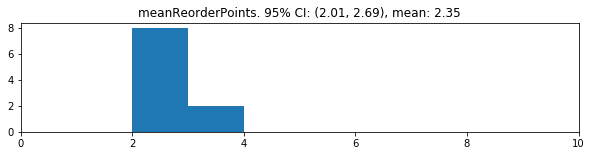

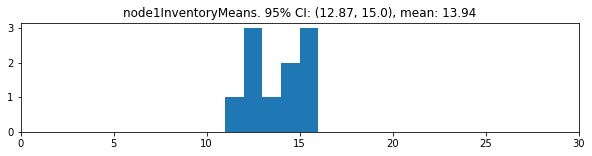

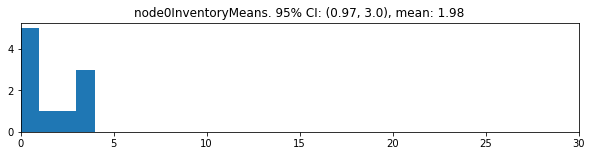

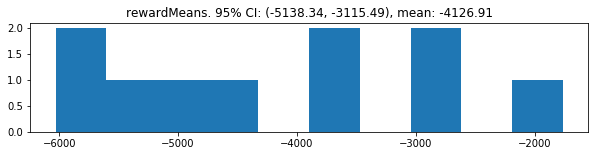

In [26]:
# confidence interval
import scipy.stats as st

def ci(a):
    mean = np.mean(a)
    # get confidence interval
    lowerLim, upperLim = st.t.interval(0.95, len(a)-1, loc=mean, scale=st.sem(a))

    lowerLim = round(lowerLim, 2)
    mean = round(mean, 2)
    upperLim = round(upperLim, 2)
    
    return lowerLim, mean, upperLim


print(envParams, "NGame = {}".format(NGame))

plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(meanReorderPoints)
plt.title("meanReorderPoints. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(meanReorderPoints, bins=range(30))
plt.xlim((0, 10))
plt.show()
plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(node1InventoryMeans)
plt.title("node1InventoryMeans. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(node1InventoryMeans, bins=range(30))
plt.xlim((0, 30))
plt.show()
plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(node0InventoryMeans)
plt.title("node0InventoryMeans. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(node0InventoryMeans, bins=range(30))
plt.xlim((0, 30))
plt.show()
plt.figure(figsize=(10, 2))
lowerLim, mean, upperLim = ci(rewardMeans)
plt.title("rewardMeans. 95% CI: ({}, {}), mean: {}".format(lowerLim, upperLim, mean))
plt.hist(rewardMeans)
plt.show()



In [27]:
# save experiment results

import pandas as pd
import time

timestamp = int(time.time())

filename = "{}-{}-{}_{}_{}-{}_{}_{}".format(envParams["inventoryCost"][0], envParams["inventoryCost"][1], envParams["inventoryCost"][2], envParams["stockoutCost"], envParams["muDemand"], envParams["stdDemand"], envParams["N"], NGame)

# raw data
_a = pd.DataFrame(reorderPointsAll).T
_b = pd.DataFrame(node1InventoriesAll).T
_c = pd.DataFrame(node0InventoriesAll).T
_d = pd.DataFrame(rewardsAll).T
datadf = pd.concat([_a, _b, _c, _d], axis=1, keys=['reorderPointsAll', 'node1InventoriesAll', 'node0InventoriesAll', 'rewardsAll'])

# results
resultsdf = pd.DataFrame(zip(meanReorderPoints, node1InventoryMeans, node0InventoryMeans, rewardMeans), columns=["meanReorderPoints", "node1InventoryMeans", "node0InventoryMeans", "rewardMeans"])

# metadata
metadatadf = pd.DataFrame(envParams)

metadatadf.to_csv("exp_results/policygradient_{}_{}_metadata.csv".format(filename, timestamp))
datadf.to_csv("exp_results/policygradient_{}_{}_data.csv".format(filename, timestamp))
resultsdf.to_csv("exp_results/policygradient_{}_{}_results.csv".format(filename, timestamp))

Time Series


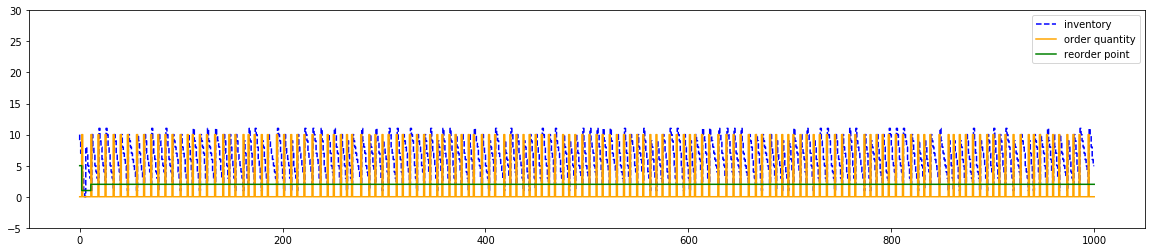

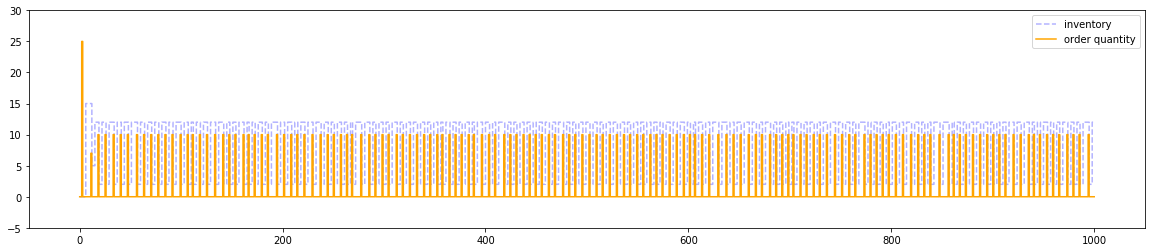

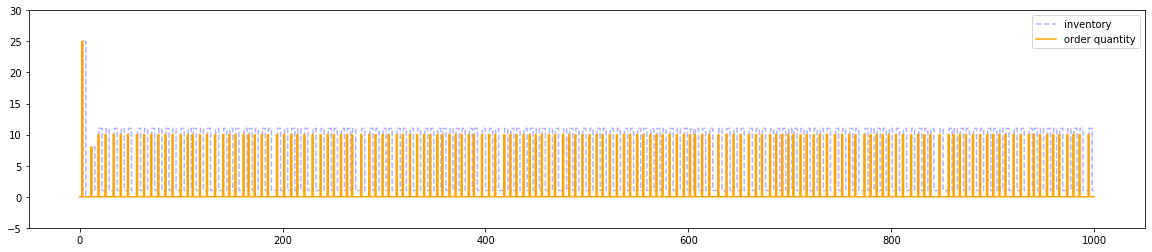

Service Time


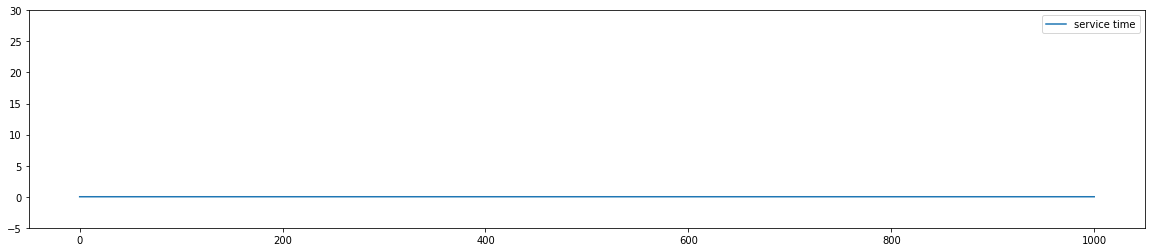

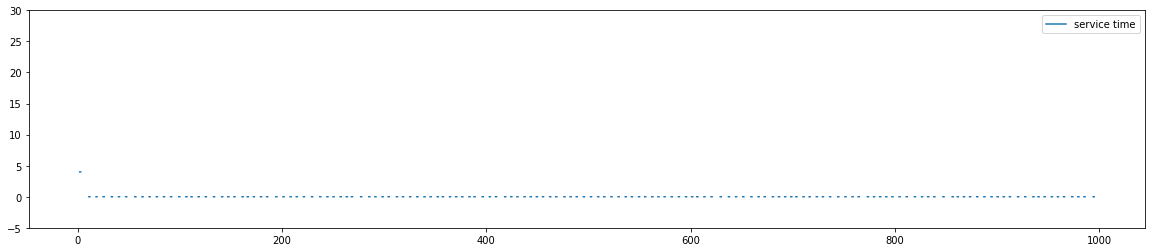

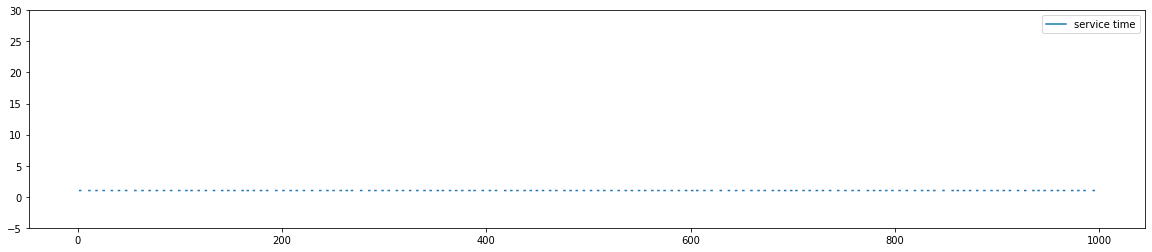

Inventory


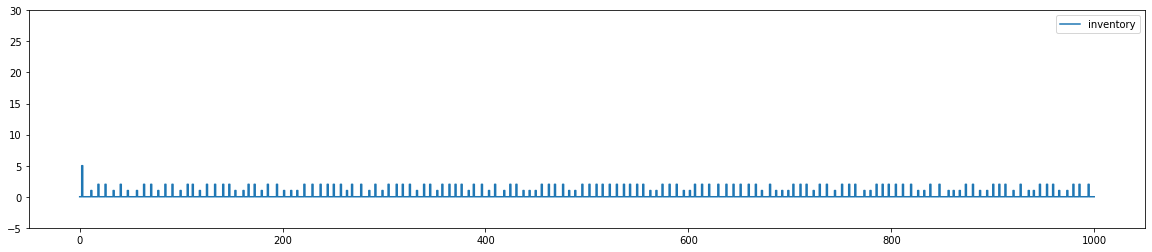

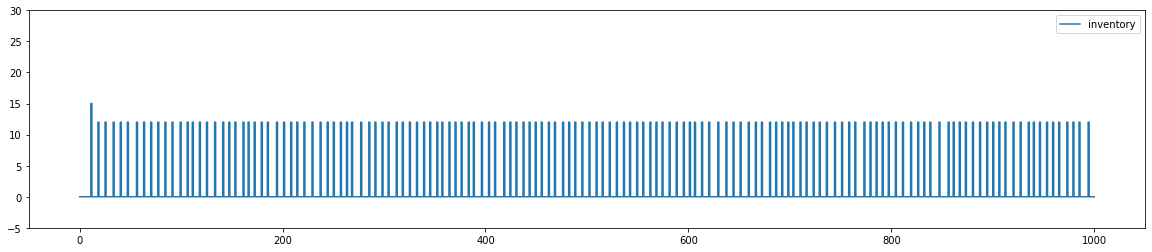

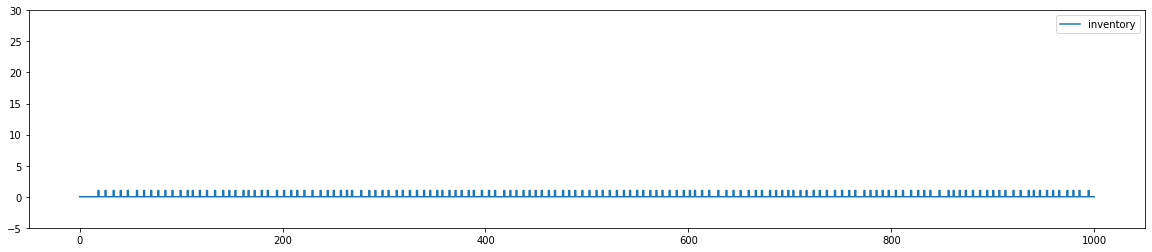

Rewards


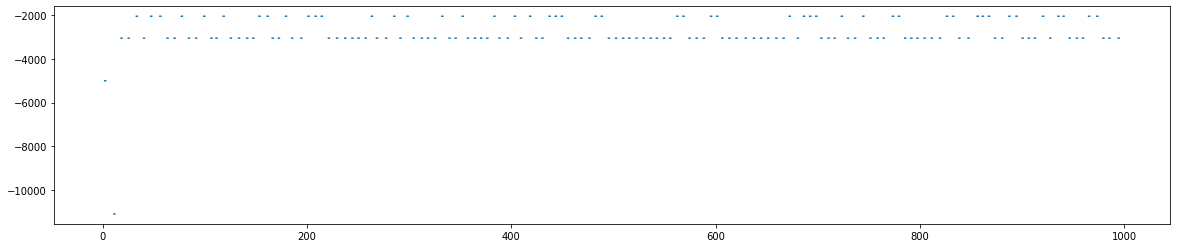

In [33]:
# visualize latest simulation
visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

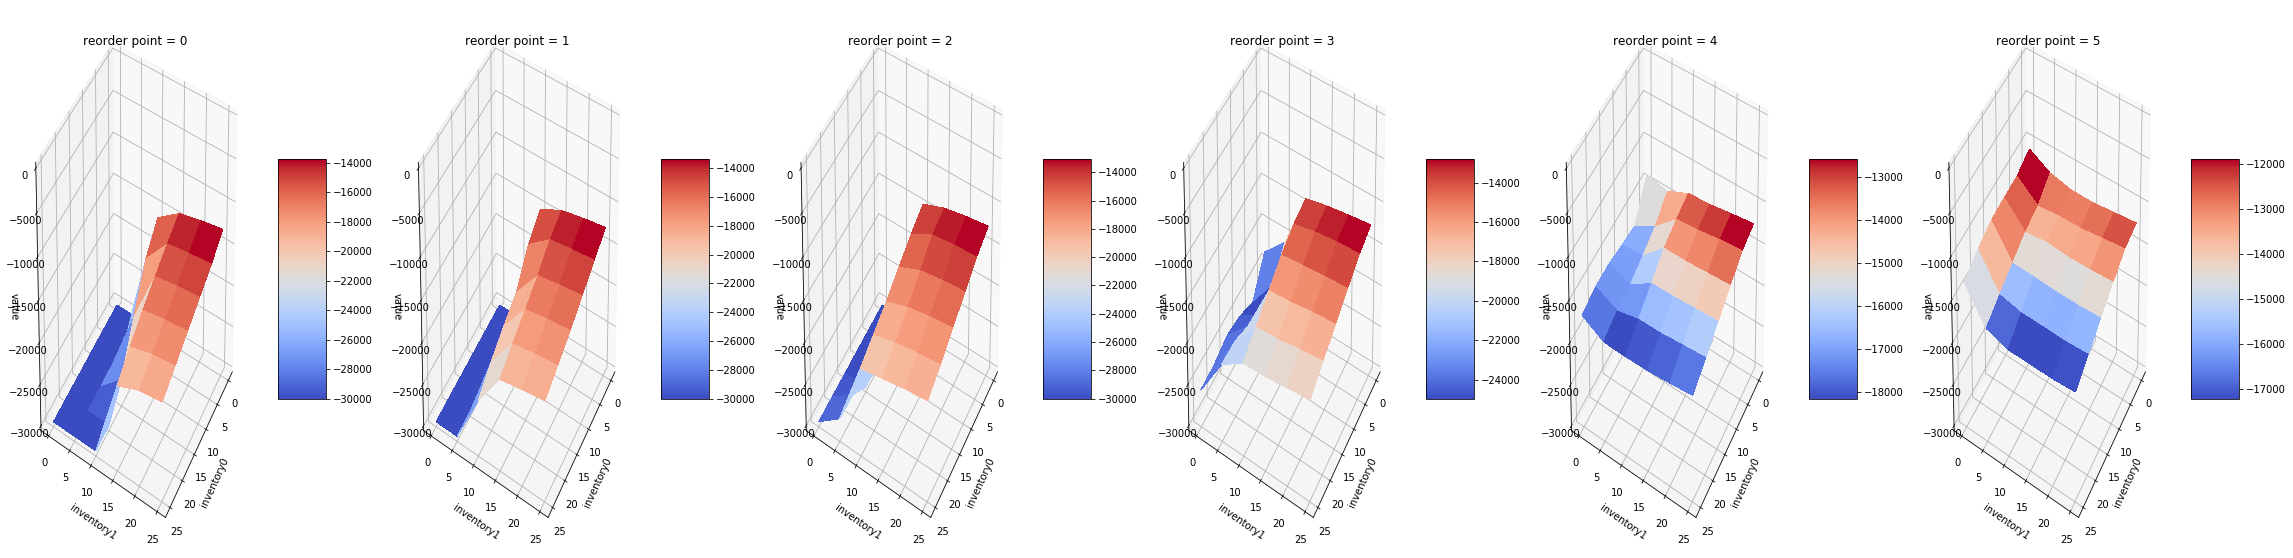

In [29]:
"""
Illustrate Value Network
proxy to objective function
"""
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm


fig = plt.figure(figsize=(40, 10))
for w in range(0, 6, 1):
    loc = w + 1
    ax = fig.add_subplot(1, 6, loc, projection='3d')
    # Make data.
    X = np.arange(0, 30, 5)
    Y = np.arange(0, 30, 5)
    X, Y = np.meshgrid(X, Y)

    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            s = np.array([X[i,j], Y[i,j], w])
            state = np.reshape(s, (1, 3))
            z = plannerAgent.value_estimator.predict(state)
            Z[i, j] = z if z > -30000 else -30000

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_title("reorder point = {}".format(w))
    ax.set_xlabel("inventory0")
    ax.set_ylabel("inventory1")
    ax.set_zlabel("value")
    
    ax.set_zlim((-30000, 0))
    ax.view_init(30, 30)
    
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
plt.show()


row 0: node0_Order, row 1: node1_Order, row 2: reorderPoint


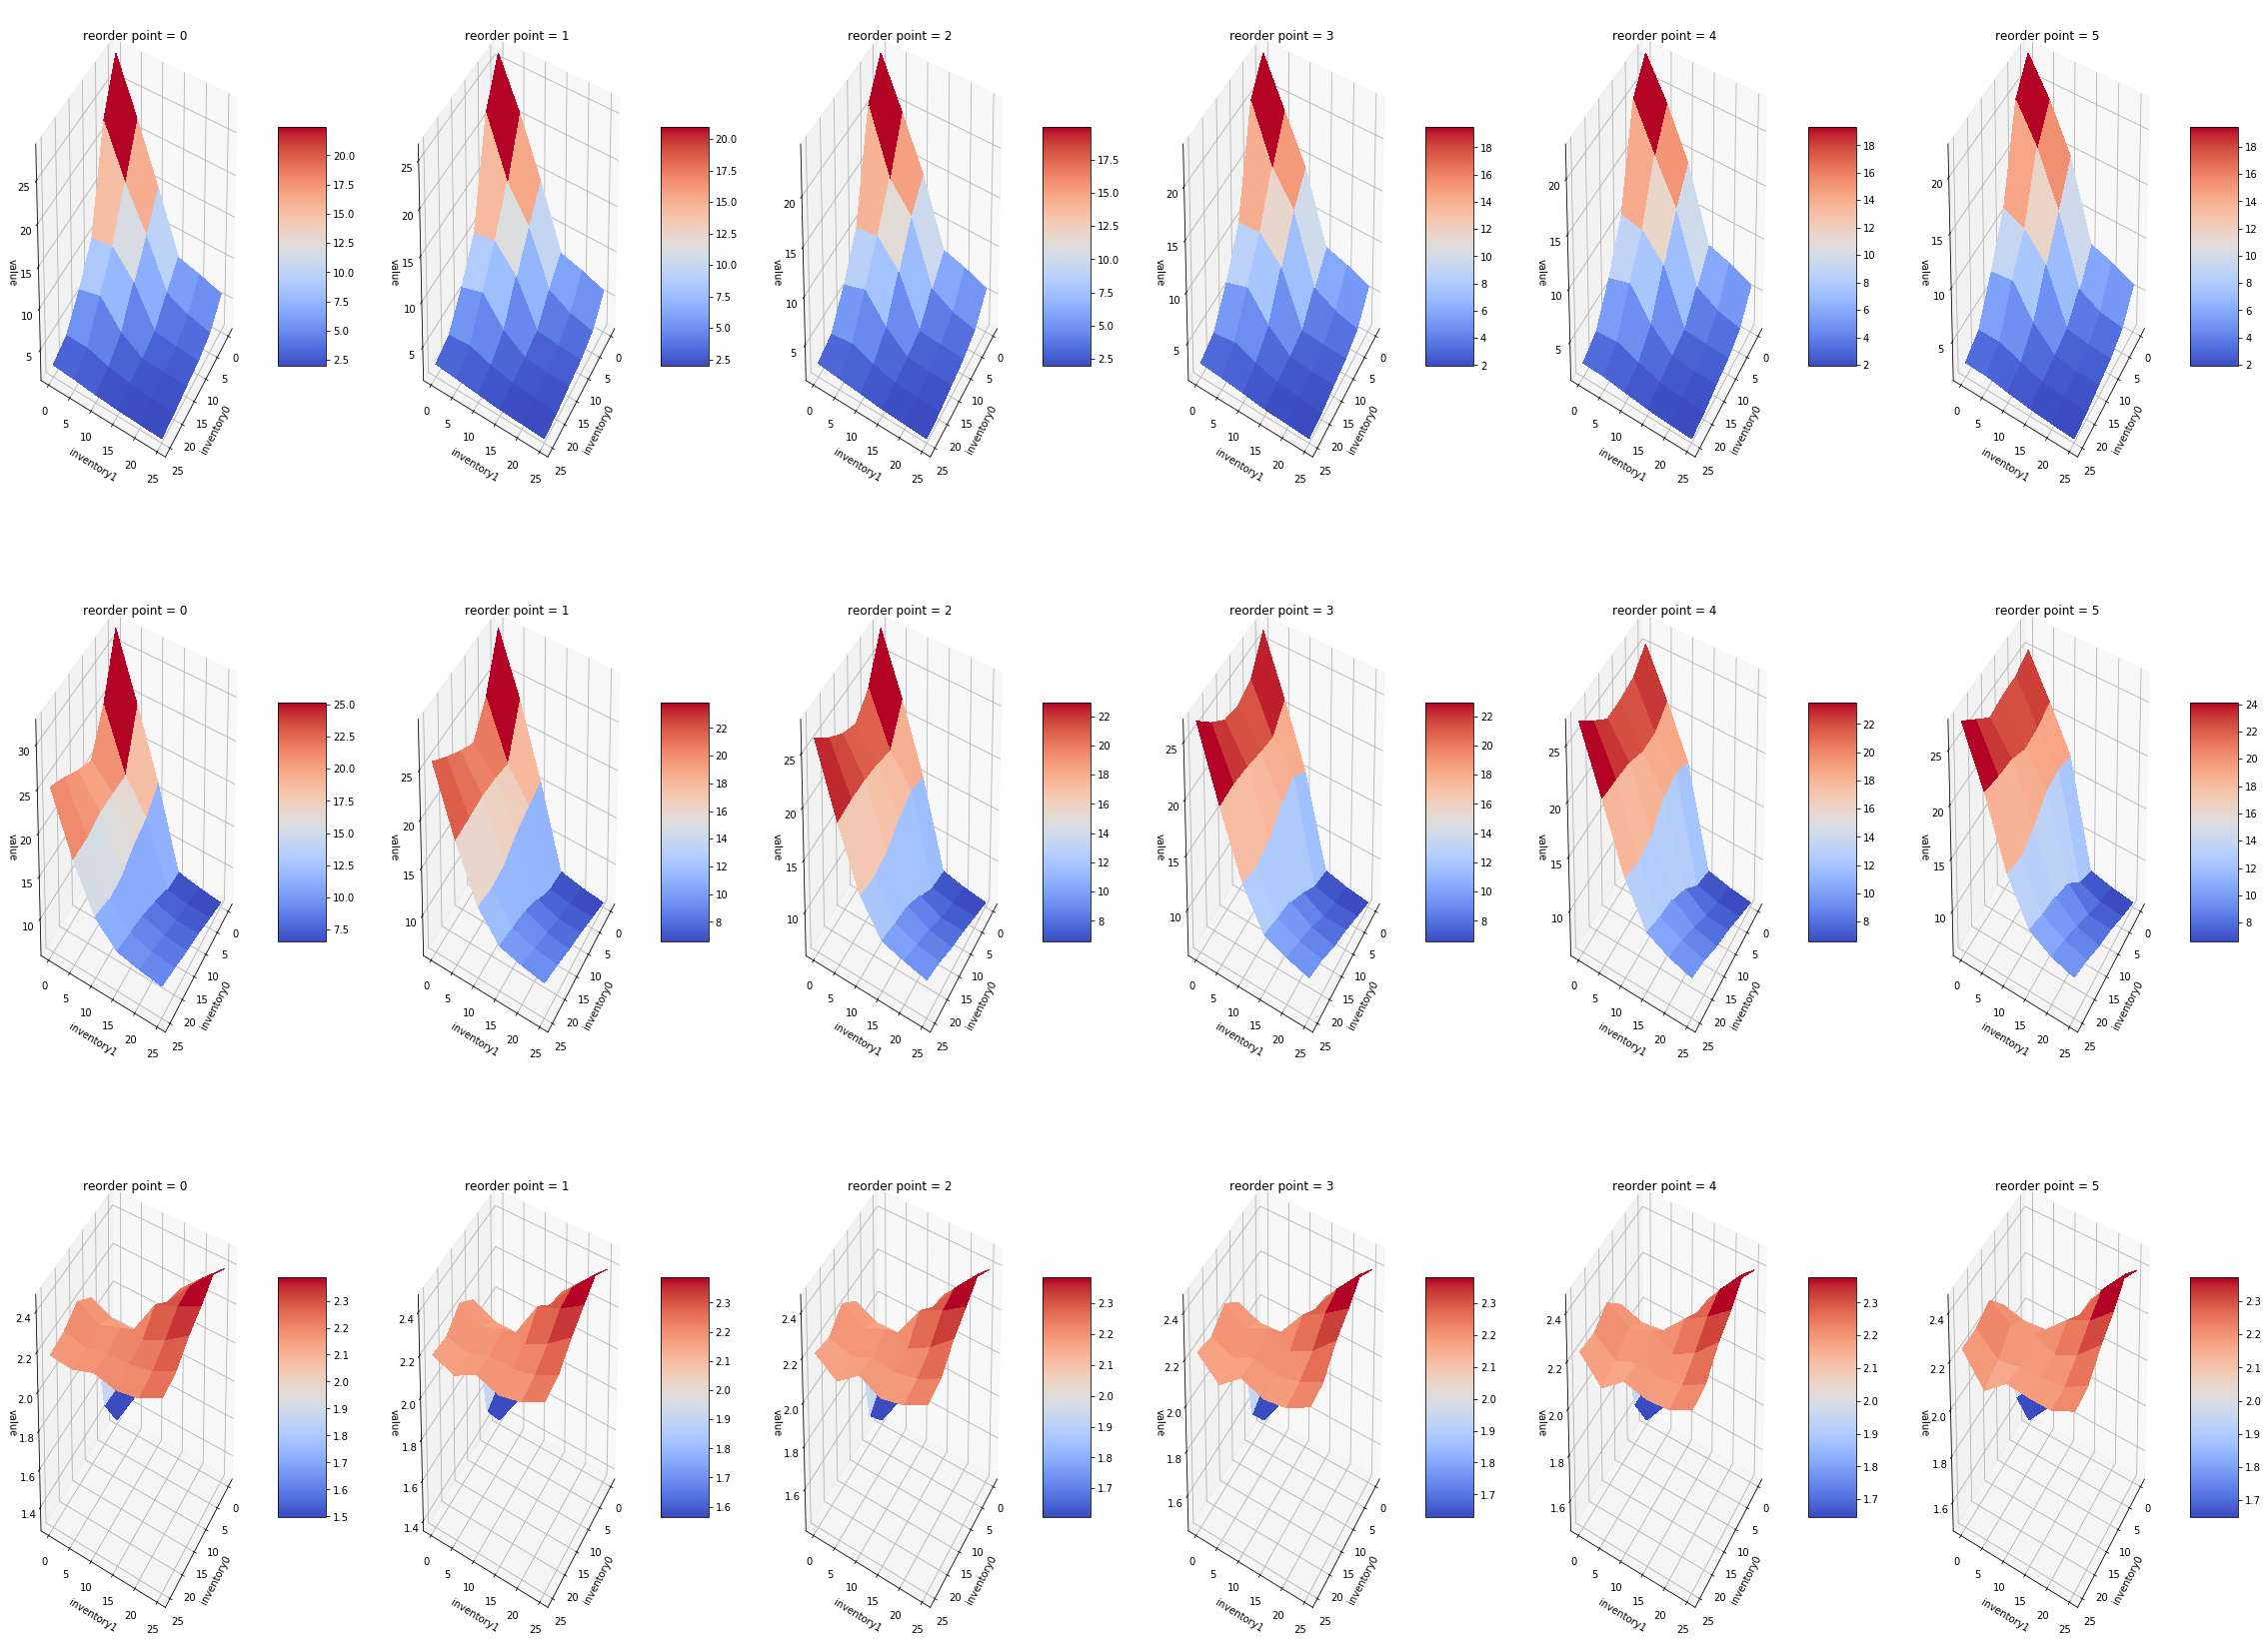

In [30]:
"""
Illustrate Policy Network
proxy to objective function
"""

from matplotlib import cm


fig = plt.figure(figsize=(40, 30))
for actionID in range(3):
    for w in range(0, 6, 1):
        loc = (6*actionID) + (w+1)
        ax = fig.add_subplot(3, 6, loc, projection='3d')
        # Make data.
        X = np.arange(0, 30, 5)
        Y = np.arange(0, 30, 5)
        X, Y = np.meshgrid(X, Y)

        Z = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                s = np.array([X[i,j], Y[i,j], w])
                state = s
                mu, a = plannerAgent.policy_estimator.predict(state, capacity=[30, 30, 30], retailerOrderQty=10)
                z = mu[actionID]
                Z[i, j] = z

        # Plot the surface.
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        ax.set_title("reorder point = {}".format(w))
        ax.set_xlabel("inventory0")
        ax.set_ylabel("inventory1")
        ax.set_zlabel("value")
        ax.view_init(30, 30)

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

print("row 0: node0_Order, row 1: node1_Order, row 2: reorderPoint")
        
plt.show()


Time Series


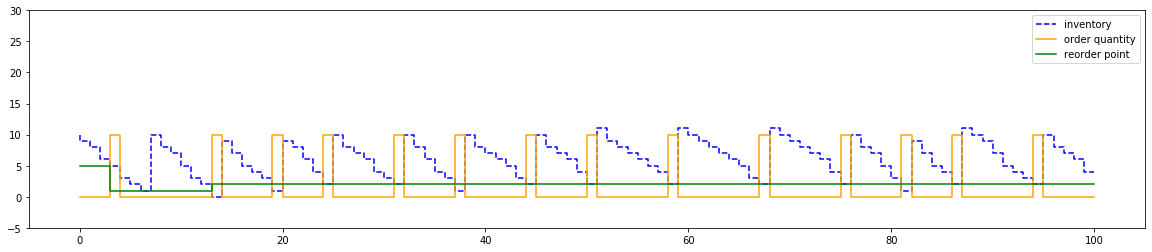

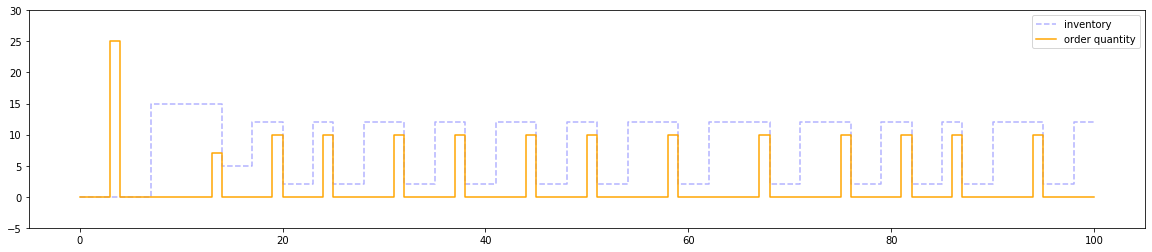

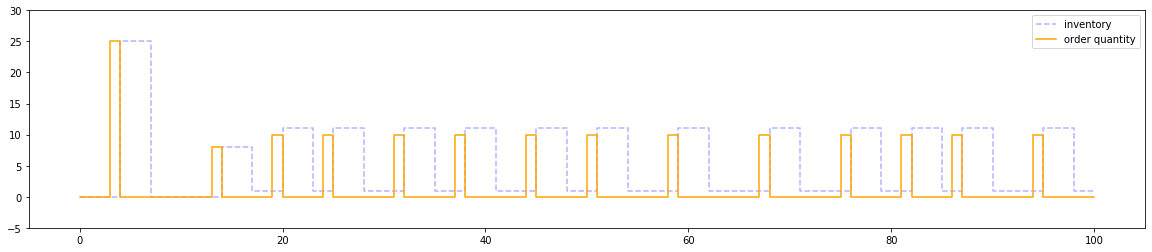

Service Time


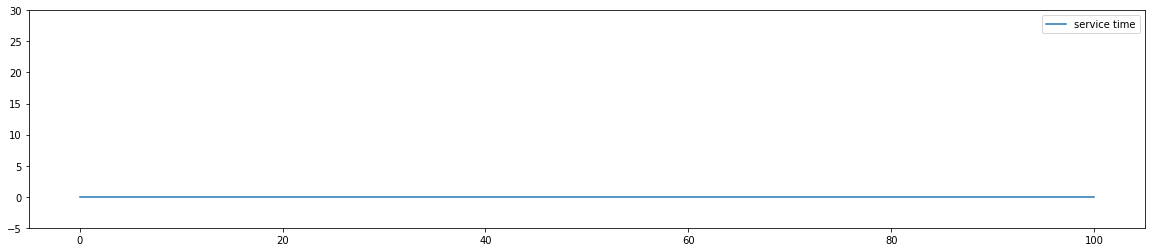

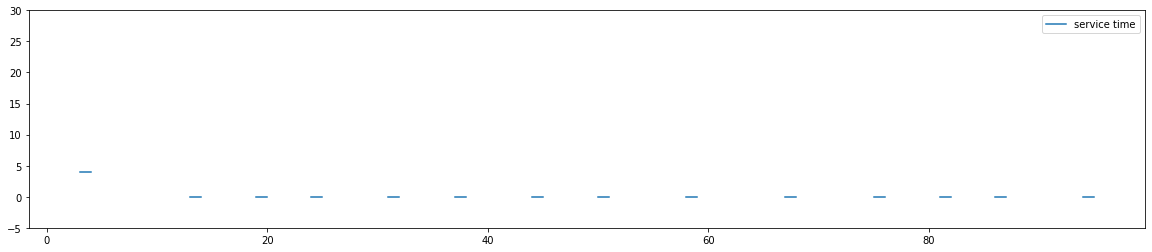

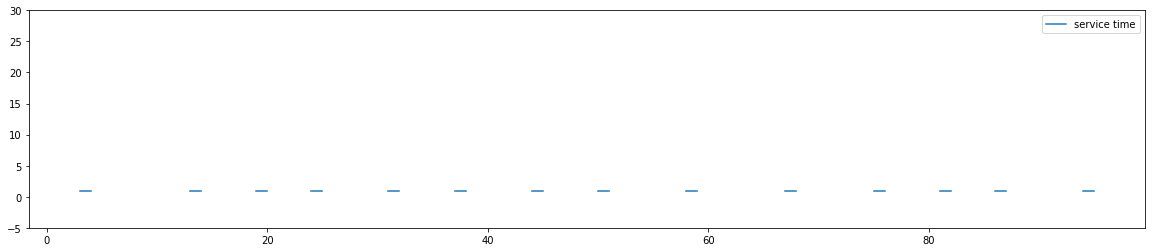

Inventory


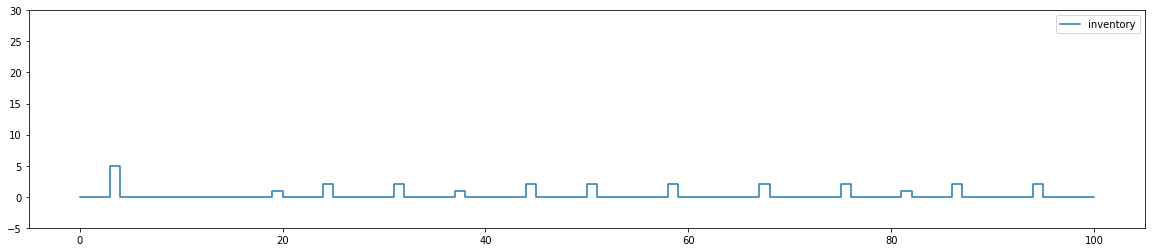

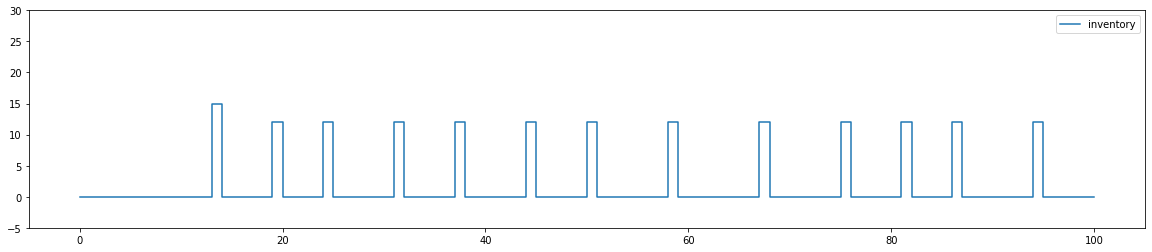

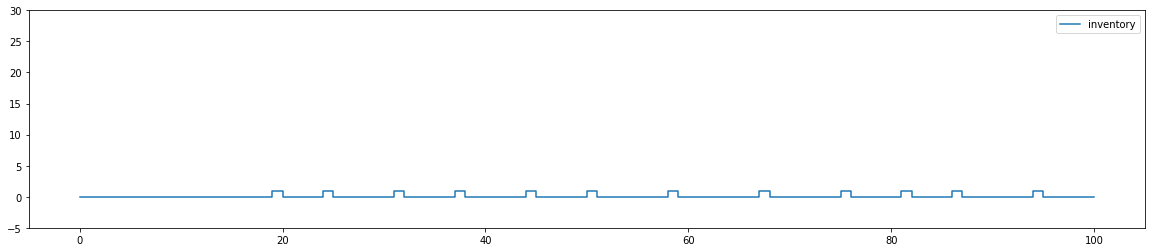

Rewards


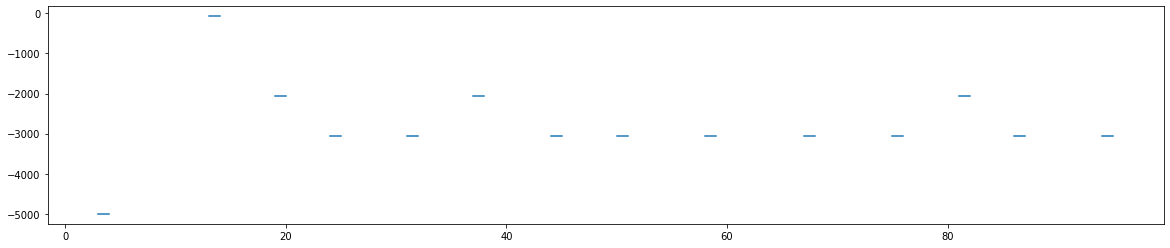

In [34]:
envParams["N"] = 100
plannerAgent.policy_estimator.stdVal = 0
stateHistory, actionHistory, rewardHistory, _ = game.runEpisode(envParams, plannerAgent, train=False)
visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])